# Summary of results so far (single preparation axis rotation for the 3 channels under study)

### Exploring the noise model:

I study 3 different implementations of the simple noise model to see if there are any differences in manifestations of the noise and whether it really does decay exponentially (according to Chernoff/Chebyshev bounds for probability distribution deviations from the mean) 

[I show only two here as the first one is identical to noise model I have decided to use for my simulations] 

## Noise model 1:

Sampling all at once from the combined probability vector composed of projector expectations of the form:

$$ \hat{\tilde{P}} = (1-\epsilon)\hat{P} + \epsilon \hat{\mathbb{1}} $$

where $\epsilon \in [0, 0.5]$ is the noise parameter and $\hat{\tilde{P}}$ denotes the noisier version of the true projector $\hat{P}$. 

Then I apply a correction, assuming I know what $\epsilon$ is (this is the noise parameter $\epsilon_{T}$ I specify at the start of the model that is randomly sampled from a binomial distribution i.e. $\epsilon_{T} \in \mathcal{B}(\epsilon, M)$  where $M$ is the number of measurements). And in the weak law of large numbers limit $\epsilon$ converges to it as $E(\epsilon) \rightarrow \epsilon_{T}$ as $M \rightarrow \infty$ by definition.

The correction is as follows:

$$\text{Tr }\hat{P}\rho = \frac{\text{Tr }\hat{\tilde{P}}\rho - \text{Tr }\epsilon_{T}\rho}{1-\epsilon_{T}} = \frac{\text{Tr }\hat{\tilde{P}}\rho - \epsilon_{T}}{1-\epsilon_{T}}$$

($\rho$ denotes a state and the last equality follows for pure states which probably what we will consider for a while)



I test out deviations of the X noisy expectation vector from the X true expectation vector and average over 10000 times to see canonical noise behavior. Below is a plot of this that demonstrates this.

(Note that the binomial distribution is symmetric about [0.5, 0.5] so my max noise is 0.5 after which the behavior gets a bit unpredictable as the quantum noise inherent to $\hat{P}$ takes over)

In [108]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pickle

<IPython.core.display.Javascript object>


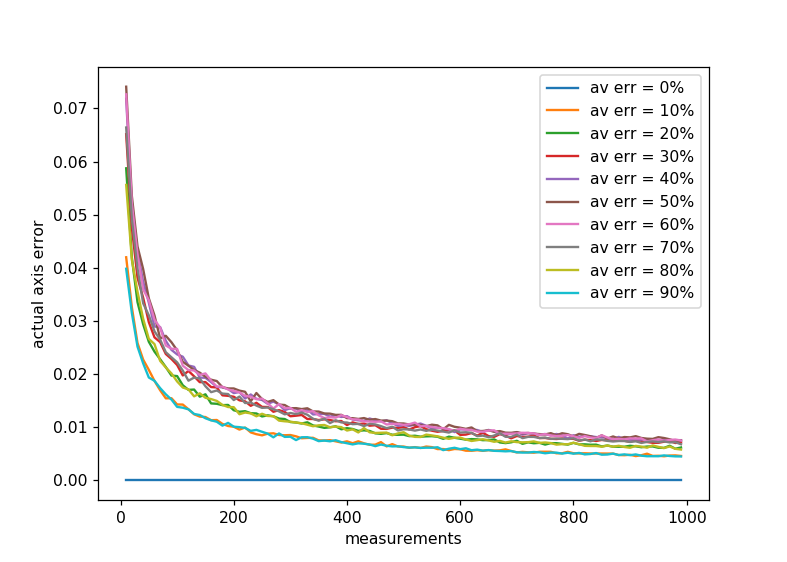

Text(0, 0.5, 'actual axis error')

In [109]:
plt.figure(figsize=(7,5))
for i in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]:
    with open("e{}vsm_root.pickle".format(i), "rb") as handle:
        cc = pickle.load(handle)
    plt.plot(np.arange(10, 1000, 10), cc, label='av err = {}%'.format(i))
plt.legend()
plt.xlabel("measurements")
plt.ylabel("actual axis error")

 ### Fitting an exponential curve through the noise model gives:

<IPython.core.display.Javascript object>


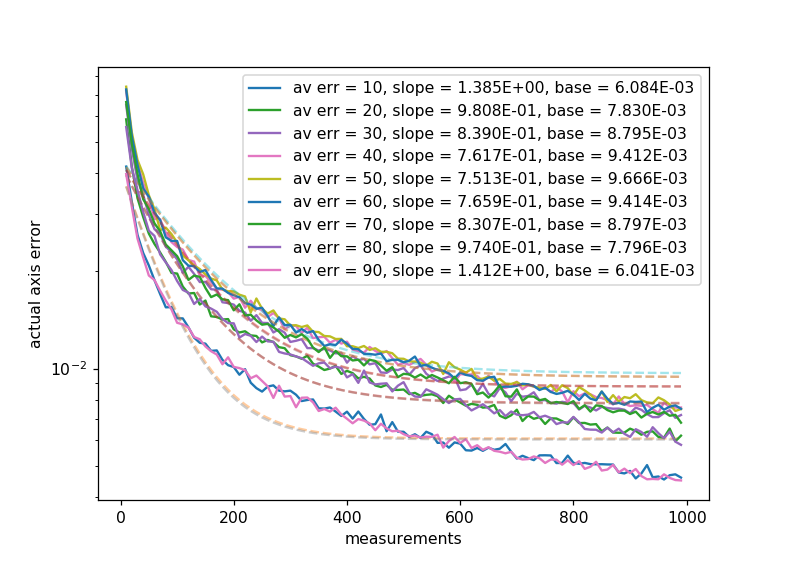

Text(0, 0.5, 'actual axis error')

In [110]:
def func(x, b, c):
     return 3.5e-2*np.exp(0.01*(-b * x))+c

plt.figure(figsize=(7,5))
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    with open("e{}vsm_root.pickle".format(i), "rb") as handle:
        cc = pickle.load(handle)
    popt, pcov = curve_fit(func, np.arange(10, 1000, 10), cc)
    slope, a = popt[0], popt[1]
    plt.semilogy(np.arange(10, 1000, 10), cc, label='av err = {}, slope = {:.3E}, base = {:.3E}'.format(i, slope, a))
    plt.semilogy(np.arange(10, 1000, 10), func(np.arange(10, 1000, 10), popt[0], popt[1]), '--', alpha=0.4)
plt.legend()
plt.xlabel("measurements")
plt.ylabel("actual axis error")

Not bad to characterize initial noise decay but not quite right...

### Fitting a power law gives better outcomes (in fact the variance should just decay as $1 / \sqrt{M}$ according to the central limit theorem)

<IPython.core.display.Javascript object>


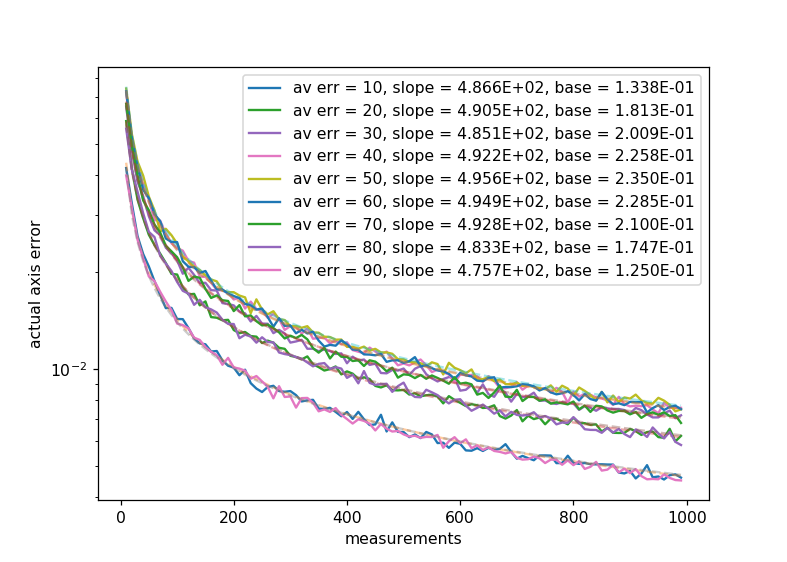

Text(0, 0.5, 'actual axis error')

In [5]:
def func(x, b, c):
     return c*x**(0.001*(-b))

plt.figure(figsize=(7,5))
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    with open("e{}vsm_root.pickle".format(i), "rb") as handle:
        cc = pickle.load(handle)
    popt, pcov = curve_fit(func, np.arange(10, 1000, 10), cc, p0=(1,1), maxfev=6000)
    slope, a = popt[0], popt[1]
    plt.semilogy(np.arange(10, 1000, 10), cc, label='av err = {}, slope = {:.3E}, base = {:.3E}'.format(i, slope, a))
    plt.semilogy(np.arange(10, 1000, 10), func(np.arange(10, 1000, 10), popt[0], popt[1]), '--', alpha=0.4)
plt.legend()
plt.xlabel("measurements")
plt.ylabel("actual axis error")

### as expected, the power law obeys the central limit theorem result

## Noise model 2:

In this model I choose to sample $M$ measurements from the true expectation $\hat{P}$ vector and the noise vector [0.5, 0.5] based on a ratio governed by sampling $\epsilon$ randomly from the same binomial distribution mentioned above. I do this serially instead of doing it all at once and then average over X true and X noisy expectation to compare error convergence. In this case, the noise dies (too) slowly

<IPython.core.display.Javascript object>


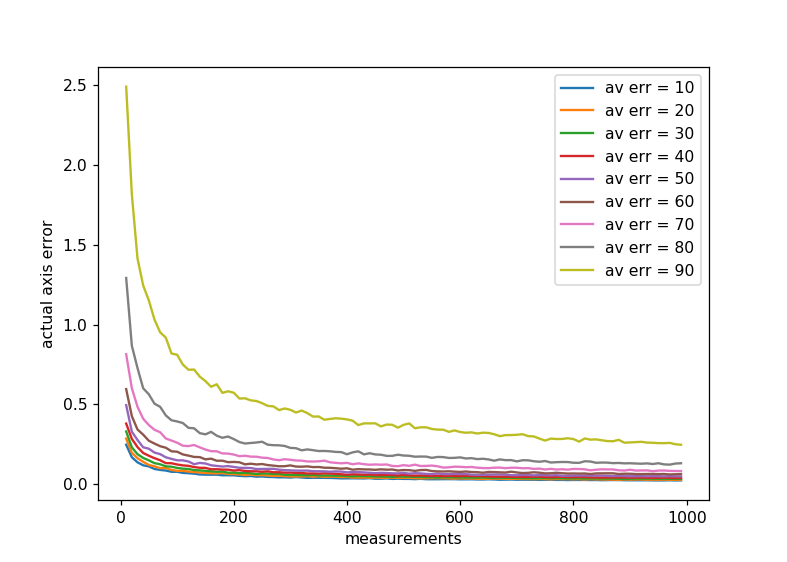

Text(0, 0.5, 'actual axis error')

In [111]:
plt.figure(figsize=(7,5))
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    with open("e{}vsm_method_serial.pickle".format(i), "rb") as handle:
        cc = pickle.load(handle)
    plt.plot(np.arange(10, 1000, 10), cc, label='av err = {}'.format(i, slope, a))

plt.legend()
plt.xlabel("measurements")
plt.ylabel("actual axis error")

<IPython.core.display.Javascript object>


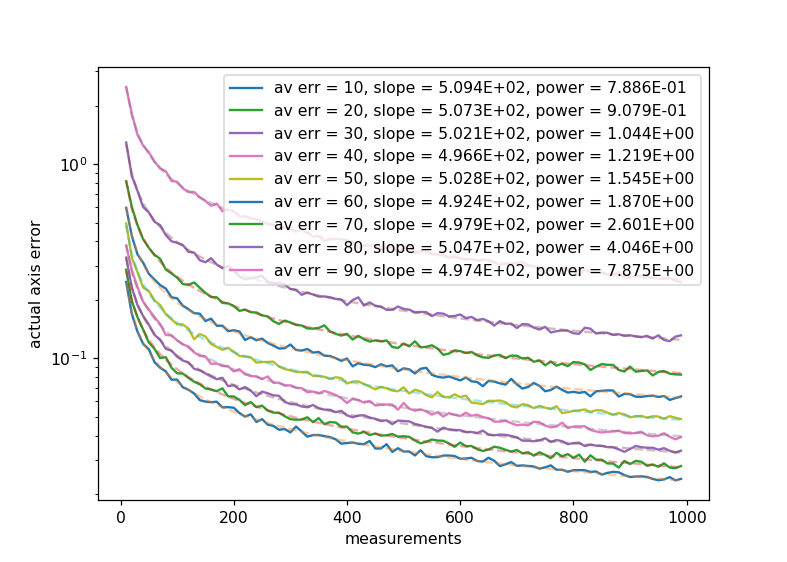

Text(0, 0.5, 'actual axis error')

In [7]:

plt.figure(figsize=(7,5))
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    with open("e{}vsm_method_serial.pickle".format(i), "rb") as handle:
        cc = pickle.load(handle)
    popt, pcov = curve_fit(func, np.arange(10, 1000, 10), cc)
    slope, a = popt[0], popt[1]
    plt.semilogy(np.arange(10, 1000, 10), cc, label='av err = {}, slope = {:.3E}, power = {:.3E}'.format(i, slope, a))
    plt.semilogy(np.arange(10, 1000, 10), func(np.arange(10, 1000, 10), popt[0], popt[1]), '--', alpha=0.4)
plt.legend()
plt.xlabel("measurements")
plt.ylabel("actual axis error")

<IPython.core.display.Javascript object>


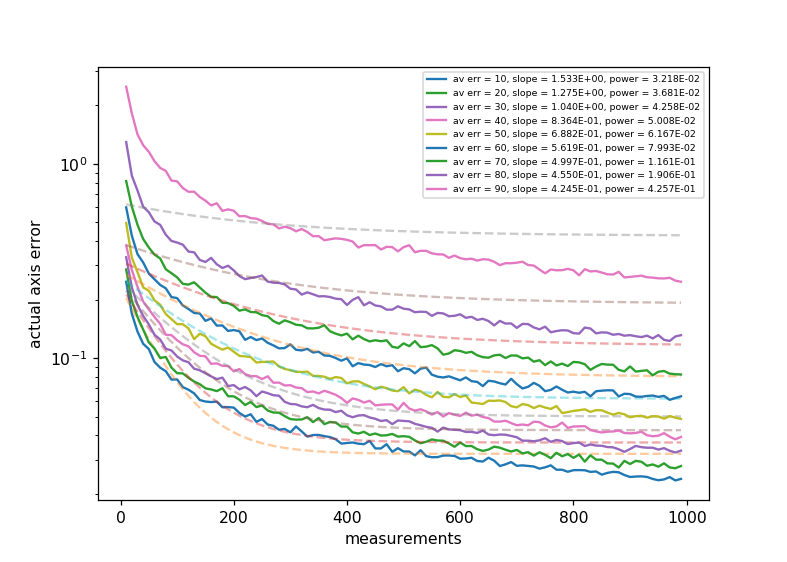

Text(0, 0.5, 'actual axis error')

In [112]:
def func(x, b, c):
     return 2e-1*np.exp(0.01*(-b * x))+c
    
plt.figure(figsize=(7,5))
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    with open("e{}vsm_method_serial.pickle".format(i), "rb") as handle:
        cc = pickle.load(handle)
    popt, pcov = curve_fit(func, np.arange(10, 1000, 10), cc)
    slope, a = popt[0], popt[1]
    plt.semilogy(np.arange(10, 1000, 10), cc, label='av err = {}, slope = {:.3E}, power = {:.3E}'.format(i, slope, a))
    plt.semilogy(np.arange(10, 1000, 10), func(np.arange(10, 1000, 10), popt[0], popt[1]), '--', alpha=0.4)
plt.legend(fontsize=6)
plt.xlabel("measurements")
plt.ylabel("actual axis error")

Worse than before, looks pretty noisy (slowly converging) and is much slower than first model but does seem to work for error > 50%. I decided to not continue with this model as it is much too slow for results and the first model approximates quite well the noise we want to incorporate in the diamond norm computation

## Diamond norm decay rate plot for different noise levels and different channels

<IPython.core.display.Javascript object>


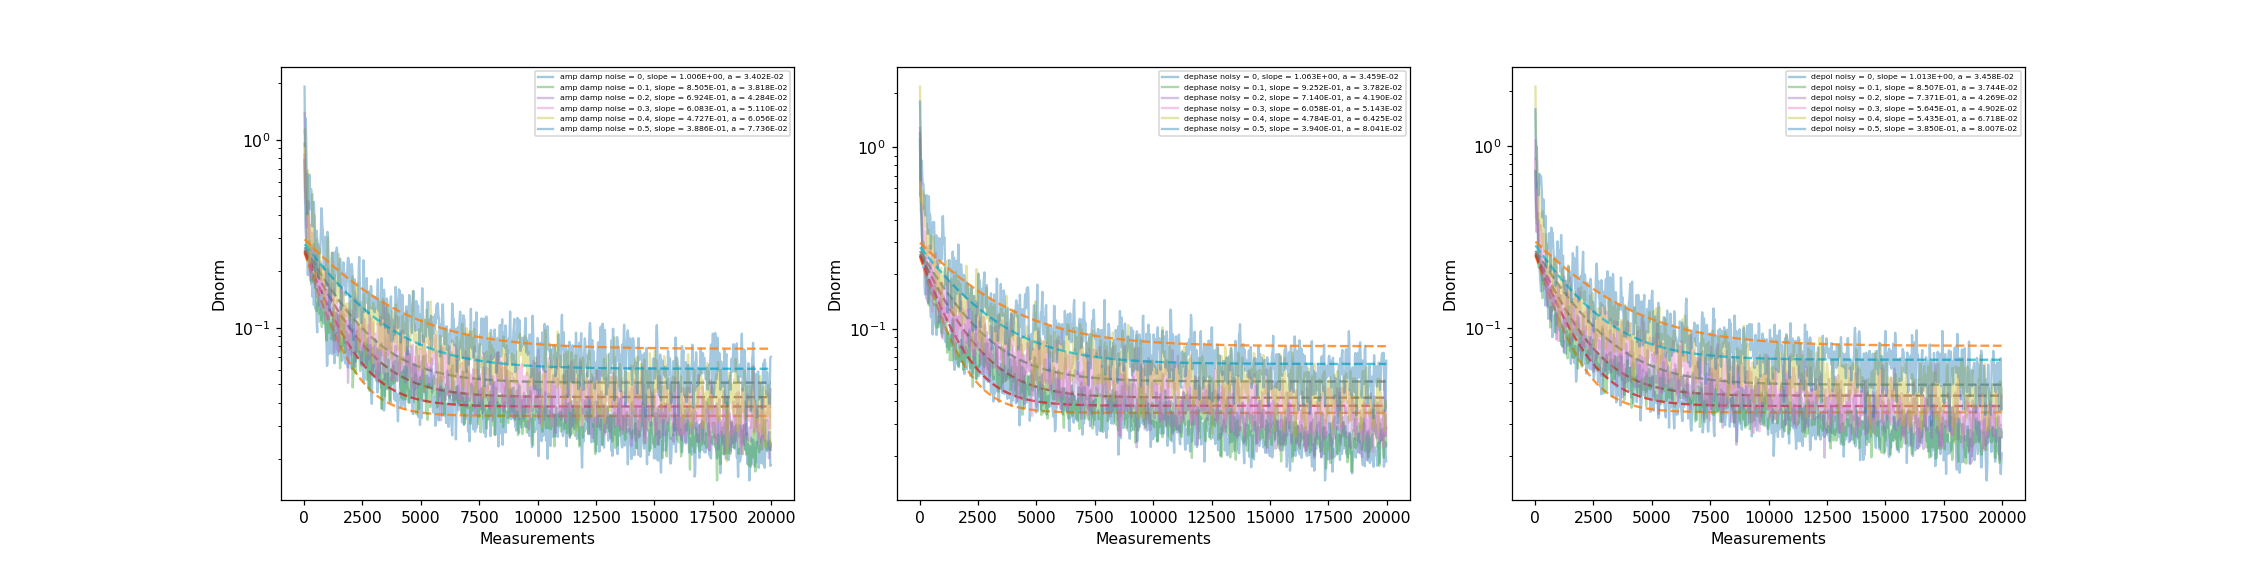

In [113]:
def func(x, b, c):
     return 0.22*np.exp((0.001*(-b * x))) + c

def ma(array, window=5): 
    "just a simple convolution with const weights function i.e. 1"
    
    return np.convolve(np.array(array), np.ones((window,))/window, mode='valid')


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
w=2   # smooth out the noise by choosing a moving average window
xcutoff = 19000  # cutoffs for fitting decay curve ansatz
ycutoff = 3
measurements = ma(np.arange(10,20000, 20), w)
measurements2 = ma(np.arange(10,20000, 20), 1)
for noise in [0,0.1, 0.2, 0.3, 0.4, 0.5]:
    with open("ampdamp_rootlongsimple{}n.pickle".format(int(noise*100)), "rb") as handle:
        c1n = pickle.load(handle)
    with open("dephase_rootlongsimple{}n.pickle".format(int(noise*100)), "rb") as handle:
        c2n = pickle.load( handle)
        
    with open("depol_rootlongsimple{}n.pickle".format(int(noise*100)), "rb") as handle:
        c3n = pickle.load(handle)
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]

    mc3n = ma(c3n, 1)[np.where(ma(c3n, 1) < ycutoff)]
    mc3n = mc3n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, m, mc1n, p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, m, mc2n, p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, m, mc3n, p0=(1,1), maxfev=6000)
    slope3, a3 = popt[0], popt[1]
    ax[0].semilogy(measurements, ma(c1n, w), alpha=0.4, label='amp damp noise = {}, slope = {:.3E}, a = {:.3E}'.format(noise, slope1, a1))
    ax[1].semilogy(measurements, ma(c2n, w),alpha=0.4, label='dephase noisy = {}, slope = {:.3E}, a = {:.3E}'.format(noise, slope2, a2))
    ax[2].semilogy(measurements, ma(c3n, w),alpha=0.4, label='depol noisy = {}, slope = {:.3E}, a = {:.3E}'.format(noise, slope3, a3))
    
    ax[0].semilogy(measurements, func(measurements, slope1, a1), '--',alpha=0.8)
    ax[1].semilogy(measurements, func(measurements,slope2, a2), '--',alpha=0.8)
    ax[2].semilogy(measurements, func(measurements, slope3, a3), '--',alpha=0.8)

    ax[0].set_xlabel("Measurements")
    ax[1].set_xlabel("Measurements")
    ax[2].set_xlabel("Measurements")
    ax[0].set_ylabel("Dnorm")
    ax[1].set_ylabel("Dnorm")
    ax[2].set_ylabel("Dnorm")

ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[2].legend(fontsize=5)

## Fixing $\epsilon$ in noise model 1 instead of drawing from a binomial distribution:

<IPython.core.display.Javascript object>


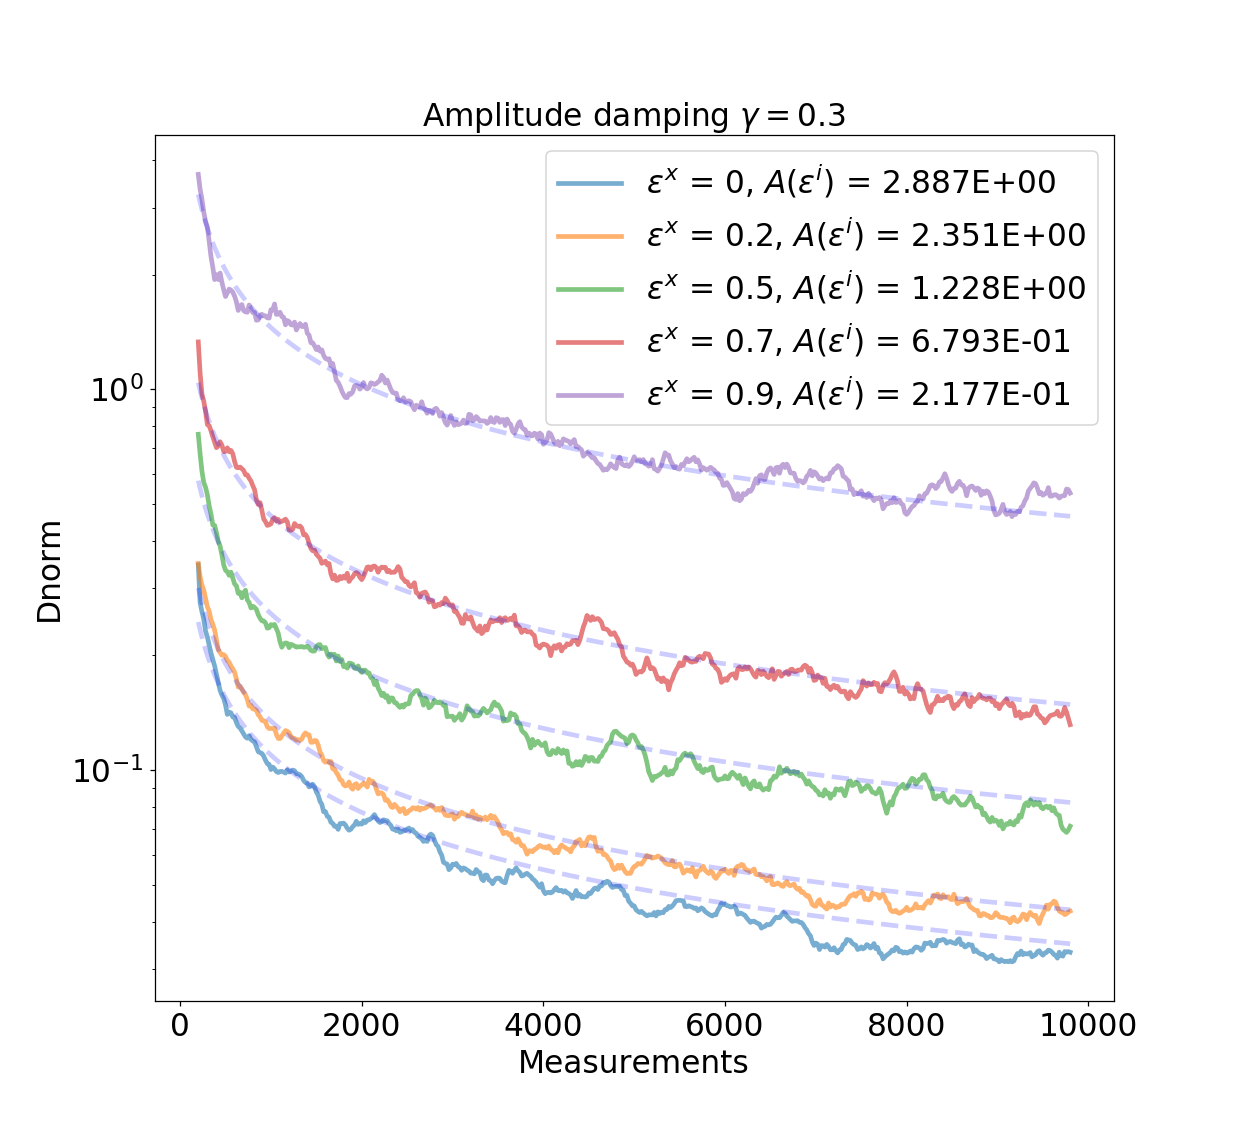

In [139]:
def func(x, b, c):
     return 0.01*b*x**(-0.5) + c*0
%matplotlib notebook
def ma(array, window=5): 
    "just a simple convolution with const weights function i.e. 1"
    
    return np.convolve(np.array(array), np.ones((window,))/window, mode='valid')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(11,10))
ax=[ax]
w=20   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 10
w2=10
measurements = ma(np.arange(10,10000, 20), w)
measurements2 = ma(np.arange(10,10000, 20), 1)
for noise in [0, 0.2, 0.5, 0.7, 0.9]:
    with open("ampdamp_fixede{}n.pickle".format(int(noise*100)), "rb") as handle:
        c1n = pickle.load(handle)

    with open("rotationx90_fixede{}n.pickle".format(int(noise*100)), "rb") as handle:
        c4n = pickle.load(handle)
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    

    
    mc4n = ma(c4n, 1)[np.where(ma(c4n, 1) < ycutoff)]
    mc4n = mc4n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc4n, w2), p0=(1,1), maxfev=6000)
    slope4, a4 = popt[0], popt[1]
    kk = r"$A(\epsilon^i)$"
    tt = r"$\epsilon^x$"
    ax[0].semilogy(measurements, ma(c1n, w), alpha=0.6, linewidth=3.0, label='{} = {}, {} = {:.3E}'.format(tt,noise, kk, 1000/slope1))
#    ax[1].semilogy(measurements, ma(c4n, w),alpha=0.6, linewidth=3.0, label='{} = {}, {} = {:.3E}'.format(tt,noise, kk, 1000/slope4))    
    
    ax[0].semilogy(measurements, func(measurements, slope1, a1), 'b--',alpha=0.2, linewidth=3.0)

 #   ax[1].semilogy(measurements, func(measurements, slope4, a4), 'b--',alpha=0.2, linewidth=3.0)
    
ax[0].set_xlabel("Measurements", fontsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
#ax[1].tick_params(axis='both', which='major', labelsize=20)
#ax[1].set_xlabel("Measurements", fontsize=20)
ax[0].set_ylabel("Dnorm", fontsize=20)
ax[0].set_title(r"Amplitude damping $\gamma=0.3$", fontsize=20)
#ax[1].set_title("X-Rotation 90 (C1)", fontsize=20)
#ax[1].set_ylabel("Dnorm", fontsize=10)

ax[0].legend(fontsize=20)

#ax[1].legend(fontsize=10)
plt.savefig("noisemodel.pdf", dpi=1000, bbox_inches='tight')

## Checking for axis-specific channel behavior to see if a channel is biased against a specific noisy axis

<IPython.core.display.Javascript object>


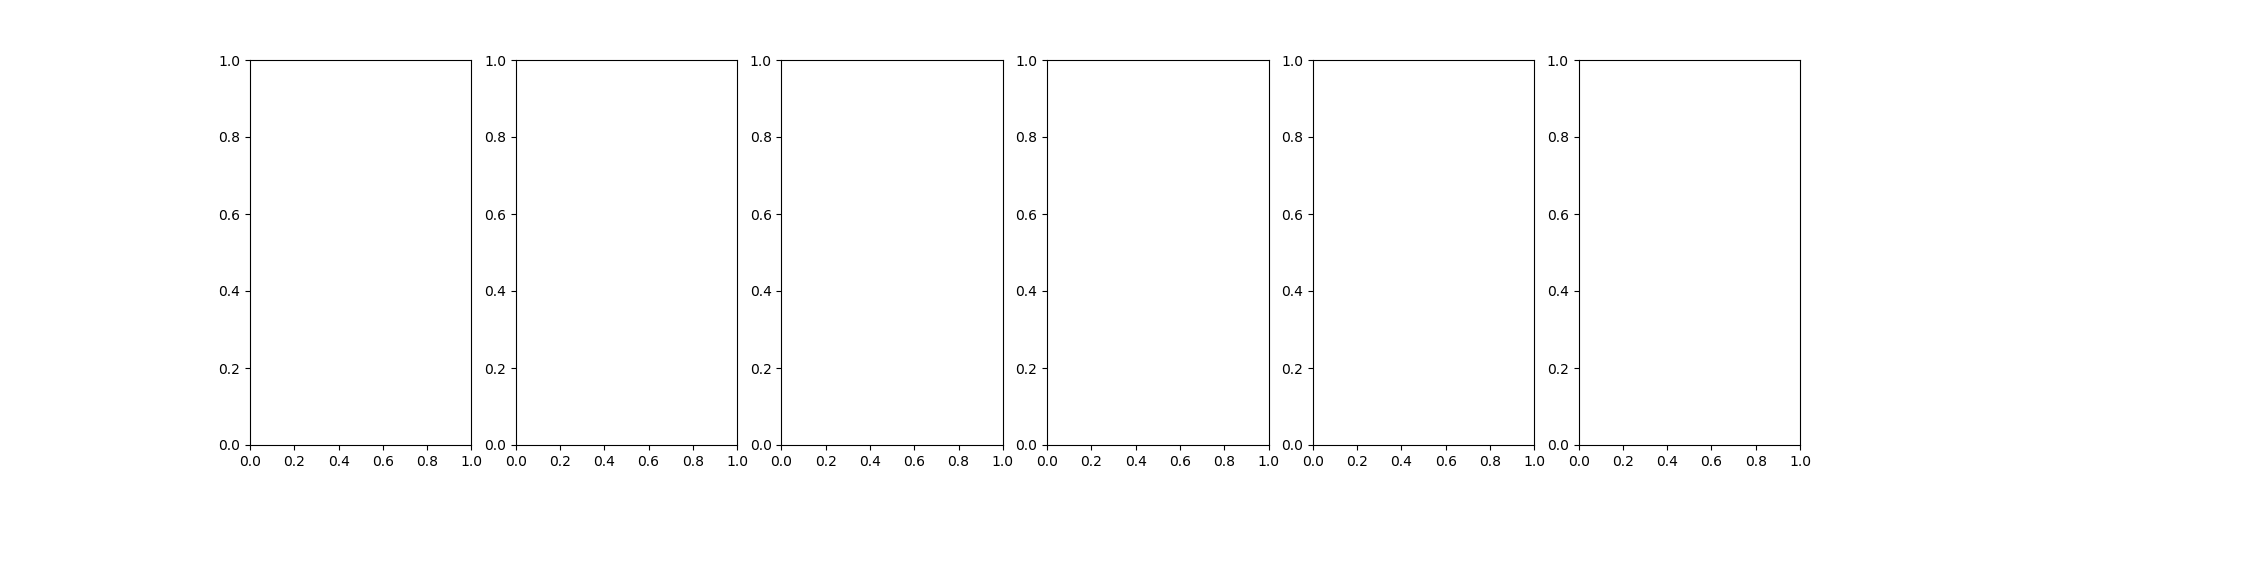

FileNotFoundError: [Errno 2] No such file or directory: 'cbias_noise/ampdamp_fixedexn4.pickle'

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))
w=10   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 3
w2=1
measurements = ma(np.arange(10,10000, 20), w)
measurements2 = ma(np.arange(10,10000, 20), 1)
for noise in ['x', 'y']:
    with open("cbias_noise/ampdamp_fixede{}n4.pickle".format(noise), "rb") as handle:
        c1n = pickle.load(handle)

    with open("cbias_noise/dephase_fixede{}n4.pickle".format(noise), "rb") as handle:
        c2n = pickle.load(handle)

    with open("cbias_noise/depol_fixede{}n4.pickle".format(noise), "rb") as handle:
        c3n = pickle.load(handle)
    with open("rotx9902_70kkk{}n.pickle".format(noise), "rb") as handle:
        c4n = pickle.load(handle)
    with open("roty9902_70kkk{}n.pickle".format(noise), "rb") as handle:
        c5n = pickle.load(handle)
    with open("rotz990_30kkk{}n.pickle".format(noise), "rb") as handle:
        c6n = pickle.load(handle)
        
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]

    mc3n = ma(c3n, 1)[np.where(ma(c3n, 1) < ycutoff)]
    mc3n = mc3n[np.where(m < xcutoff)]
    
    mc4n = ma(c4n, 1)[np.where(ma(c4n, 1) < ycutoff)]
    mc4n = mc4n[np.where(m < xcutoff)]
    
    mc5n = ma(c5n, 1)[np.where(ma(c5n, 1) < ycutoff)]
    mc5n = mc5n[np.where(m < xcutoff)]
    
    mc6n = ma(c6n, 1)[np.where(ma(c6n, 1) < ycutoff)]
    mc6n = mc6n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc3n, w2), p0=(1,1), maxfev=6000)
    slope3, a3 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc4n, w2), p0=(1,1), maxfev=9000)
    slope4, a4 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc5n, w2), p0=(1,1), maxfev=6000)
    slope5, a5 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc6n, w2), p0=(1,1), maxfev=6000)
    slope6, a6 = popt[0], popt[1]
    
    ax[0].semilogy(measurements, ma(c1n, w), alpha=0.4, label='noise = {}, slope={:.3E}'.format(noise, slope1, a1))
    ax[1].semilogy(measurements, ma(c2n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope2, a2))
    ax[2].semilogy(measurements, ma(c3n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope3, a3))
    ax[3].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope4, a4)) 
    ax[4].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope5, a5))   
    ax[5].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope6, a6))   
    
    ax[0].semilogy(measurements, func(measurements, slope1, a1), 'b--',alpha=0.3)
    ax[1].semilogy(measurements, func(measurements,slope2, a2), 'b--',alpha=0.3)
    ax[2].semilogy(measurements, func(measurements, slope3, a3), 'b--',alpha=0.3)
    ax[3].semilogy(measurements, func(measurements, slope4, a4), 'b--',alpha=0.3)
    ax[4].semilogy(measurements, func(measurements, slope5, a5), 'b--',alpha=0.3)
    ax[5].semilogy(measurements, func(measurements, slope6, a6), 'b--',alpha=0.3)
    
ax[0].set_xlabel("Measurements 30% noise")
ax[1].set_xlabel("Measurements 30% noise")
ax[2].set_xlabel("Measurements 30% noise")
ax[3].set_xlabel("Measurements 30% noise")
ax[4].set_xlabel("Measurements 30% noise")
ax[5].set_xlabel("Measurements 30% noise")
ax[0].set_ylabel("Dnorm")
ax[1].set_ylabel("Dnorm")
ax[2].set_ylabel("Dnorm")
ax[3].set_ylabel("Dnorm")
ax[4].set_ylabel("Dnorm")
ax[5].set_ylabel("Dnorm")

ax[0].legend(fontsize=8)
ax[1].legend(fontsize=8)
ax[2].legend(fontsize=8)
ax[3].legend(fontsize=8)
ax[4].legend(fontsize=8)
ax[5].legend(fontsize=8)
    
ax[0].set_title(r"Amplitude Damping, gamma = 0.3 ")
ax[1].set_title("Dephasing, gamma = 0.3")
ax[2].set_title("Depolarizing, gamma = 0.2")
ax[3].set_title("Rotation about X, theta = 90")
ax[4].set_title("Rotation about Y, theta = 90")
ax[5].set_title("Rotation about Z, theta = 90")
    

Noise behavior where the identity in the noise model 1 is normalized in the projector definition as it should be

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))
w=20   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 10
w2=10
measurements = ma(np.arange(10,6000, 20), w)
measurements2 = ma(np.arange(10,6000, 20), 1)
for noise in ['x', 'y', 'z', 'all']:
    with open("ampdamp_fixede{}n2.pickle".format(noise), "rb") as handle:
        c1n = pickle.load(handle)

    with open("dephase_fixede{}n2.pickle".format(noise), "rb") as handle:
        c2n = pickle.load(handle)

    with open("depol_fixede{}n2.pickle".format(noise), "rb") as handle:
        c3n = pickle.load(handle)
    with open("rotationx90_fixede{}n2.pickle".format(noise), "rb") as handle:
        c4n = pickle.load(handle)
    with open("rotationy90_fixede{}n2.pickle".format(noise), "rb") as handle:
        c5n = pickle.load(handle)
    with open("rotationz90_fixede{}n2.pickle".format(noise), "rb") as handle:
        c6n = pickle.load(handle)
        
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]

    mc3n = ma(c3n, 1)[np.where(ma(c3n, 1) < ycutoff)]
    mc3n = mc3n[np.where(m < xcutoff)]
    
    mc4n = ma(c4n, 1)[np.where(ma(c4n, 1) < ycutoff)]
    mc4n = mc4n[np.where(m < xcutoff)]
    
    mc5n = ma(c5n, 1)[np.where(ma(c5n, 1) < ycutoff)]
    mc5n = mc5n[np.where(m < xcutoff)]
    
    mc6n = ma(c6n, 1)[np.where(ma(c6n, 1) < ycutoff)]
    mc6n = mc6n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc3n, w2), p0=(1,1), maxfev=6000)
    slope3, a3 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc4n, w2), p0=(1,1), maxfev=6000)
    slope4, a4 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc5n, w2), p0=(1,1), maxfev=6000)
    slope5, a5 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc5n, w2), p0=(1,1), maxfev=6000)
    slope6, a6 = popt[0], popt[1]
    
    ax[0].semilogy(measurements, ma(c1n, w), alpha=0.4, label='noise = {}, slope={:.3E}'.format(noise, slope1, a1))
    ax[1].semilogy(measurements, ma(c2n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope2, a2))
    ax[2].semilogy(measurements, ma(c3n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope3, a3))
    ax[3].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope4, a4)) 
    ax[4].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope5, a5))   
    ax[5].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope6, a6))   
    
    ax[0].semilogy(measurements, func(measurements, slope1, a1), 'b--',alpha=0.3)
    ax[1].semilogy(measurements, func(measurements,slope2, a2), 'b--',alpha=0.3)
    ax[2].semilogy(measurements, func(measurements, slope3, a3), 'b--',alpha=0.3)
    ax[3].semilogy(measurements, func(measurements, slope4, a4), 'b--',alpha=0.3)
    ax[4].semilogy(measurements, func(measurements, slope5, a5), 'b--',alpha=0.3)
    ax[5].semilogy(measurements, func(measurements, slope6, a6), 'b--',alpha=0.3)
    
ax[0].set_xlabel("Measurements 30% noise")
ax[1].set_xlabel("Measurements 30% noise")
ax[2].set_xlabel("Measurements 30% noise")
ax[3].set_xlabel("Measurements 30% noise")
ax[4].set_xlabel("Measurements 30% noise")
ax[5].set_xlabel("Measurements 30% noise")
ax[0].set_ylabel("Dnorm")
ax[1].set_ylabel("Dnorm")
ax[2].set_ylabel("Dnorm")
ax[3].set_ylabel("Dnorm")
ax[4].set_ylabel("Dnorm")
ax[5].set_ylabel("Dnorm")

ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[2].legend(fontsize=5)
ax[3].legend(fontsize=5)
ax[4].legend(fontsize=5)
ax[5].legend(fontsize=5)
    
ax[0].set_title(r"Amplitude Damping, gamma = 0.3 ")
ax[1].set_title("Dephasing, gamma = 0.3")
ax[2].set_title("Depolarizing, gamma = 0.2")
ax[3].set_title("Rotation about X, theta = 90")
ax[4].set_title("Rotation about Y, theta = 90")
ax[5].set_title("Rotation about Z, theta = 90")

### Rotations noise decay without the correction term applied

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
w=20   # smooth out the noise by choosing a moving average window
xcutoff = 5000  # cutoffs for fitting decay curve ansatz
ycutoff = 0.65
w2=10
measurements = ma(np.arange(10,10000, 20), w)
measurements2 = ma(np.arange(10,10000, 20), 1)
for noise in ['x', 'z', 'y']:

    with open("rotx901c_50kkk{}n.pickle".format(noise), "rb") as handle:
        c1n = pickle.load(handle)
    with open("roty901c_50kkk{}n.pickle".format(noise), "rb") as handle:
        c2n = pickle.load(handle)
    with open("rotz901c_50kkk{}n.pickle".format(noise), "rb") as handle:
        c3n = pickle.load(handle)
        
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]

    mc3n = ma(c3n, 1)[np.where(ma(c3n, 1) < ycutoff)]
    mc3n = mc3n[np.where(m < xcutoff)]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc3n, w2), p0=(1,1), maxfev=6000)
    slope3, a3 = popt[0], popt[1]
    
    
    ax[0].loglog(measurements, ma(c1n, w), alpha=0.4, label='noise = {}, slope={:.3E}'.format(noise, slope1, a1))
    ax[1].loglog(measurements, ma(c2n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope2, a2))
    ax[2].loglog(measurements, ma(c3n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope3, a3))
 
    
#    ax[0].loglog(measurements, func(measurements, slope1, a1), 'b--',alpha=0.3)
#    ax[1].loglog(measurements, func(measurements,slope2, a2), 'b--',alpha=0.3)
#    ax[2].loglog(measurements, func(measurements, slope3, a3), 'b--',alpha=0.3)

    
ax[0].set_xlabel(r"Measurements $\epsilon=0.5$")
ax[1].set_xlabel(r"Measurements $\epsilon=0.5$")
ax[2].set_xlabel(r"Measurements $\epsilon=0.5$")

ax[0].set_ylabel("Dnorm", labelpad=0)
ax[1].set_ylabel("Dnorm", labelpad=0)
ax[2].set_ylabel("Dnorm", labelpad=0)


ax[0].legend(fontsize=8)
ax[1].legend(fontsize=8)
ax[2].legend(fontsize=8)

    

ax[0].set_title("Rotation about X, theta = 90")
ax[1].set_title("Rotation about Y, theta = 90")
ax[2].set_title("Rotation about Z, theta = 90")
plt.savefig("noise_decay_rotations_uncorrected_prob_dist.png")

#### Noise decay seems to occur too fast for it to register with the noise correction applied

## Same story for smaller angle rotations $\theta = 9$ degrees

In [ ]:
nval = 0.3 # noise value

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))
w=20   # smooth out the noise by choosing a moving average window
xcutoff = 500  # cutoffs for fitting decay curve ansatz
ycutoff = 0.3
w2=1
measurements = ma(np.arange(10,10000, 20), w)
measurements2 = ma(np.arange(10,10000, 20), 1)
for noise in ['x', 'z', 'y']:

    with open("rotx9_{}kkk{}n.pickle".format(int(nval*100), noise), "rb") as handle:
        c1n = pickle.load(handle)
    with open("roty9_{}kkk{}n.pickle".format(int(nval*100), noise), "rb") as handle:
        c2n = pickle.load(handle)
    with open("rotz9_{}kkk{}n.pickle".format(int(nval*100), noise), "rb") as handle:
        c3n = pickle.load(handle)
        
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]

    mc3n = ma(c3n, 1)[np.where(ma(c3n, 1) < ycutoff)]
    mc3n = mc3n[np.where(m < xcutoff)]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc3n, w2), p0=(1,1), maxfev=6000)
    slope3, a3 = popt[0], popt[1]
    
    
    ax[0].loglog(measurements, ma(c1n, w), alpha=0.4, label='noise = {}, slope={:.3E}'.format(noise, slope1, a1))
    ax[1].loglog(measurements, ma(c2n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope2, a2))
    ax[2].loglog(measurements, ma(c3n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope3, a3))
 
    
    ax[0].loglog(measurements, func(measurements, slope1, a1), 'b--',alpha=0.2)
    ax[1].loglog(measurements, func(measurements,slope2, a2), 'b--',alpha=0.2)
    ax[2].loglog(measurements, func(measurements, slope3, a3), 'b--',alpha=0.2)

    
ax[0].set_xlabel(r"Measurements $\epsilon={}$".format(nval))
ax[1].set_xlabel(r"Measurements $\epsilon={}$".format(nval))
ax[2].set_xlabel(r"Measurements $\epsilon={}$".format(nval))

ax[0].set_ylabel("Dnorm", labelpad=0)
ax[1].set_ylabel("Dnorm", labelpad=0)
ax[2].set_ylabel("Dnorm", labelpad=0)


ax[0].legend(fontsize=8)
ax[1].legend(fontsize=8)
ax[2].legend(fontsize=8)

    

ax[0].set_title("Rotation about X, theta = 9")
ax[1].set_title("Rotation about Y, theta = 9")
ax[2].set_title("Rotation about Z, theta = 9")
plt.savefig("noise_decay_rotations_smallangles_eis{}.png".format(int(nval*100)))

Noise behavior when extreme events with negative probabilities after corrected are simply normalized and made positive. This corrective procedure produces some complexity in the signal

<IPython.core.display.Javascript object>


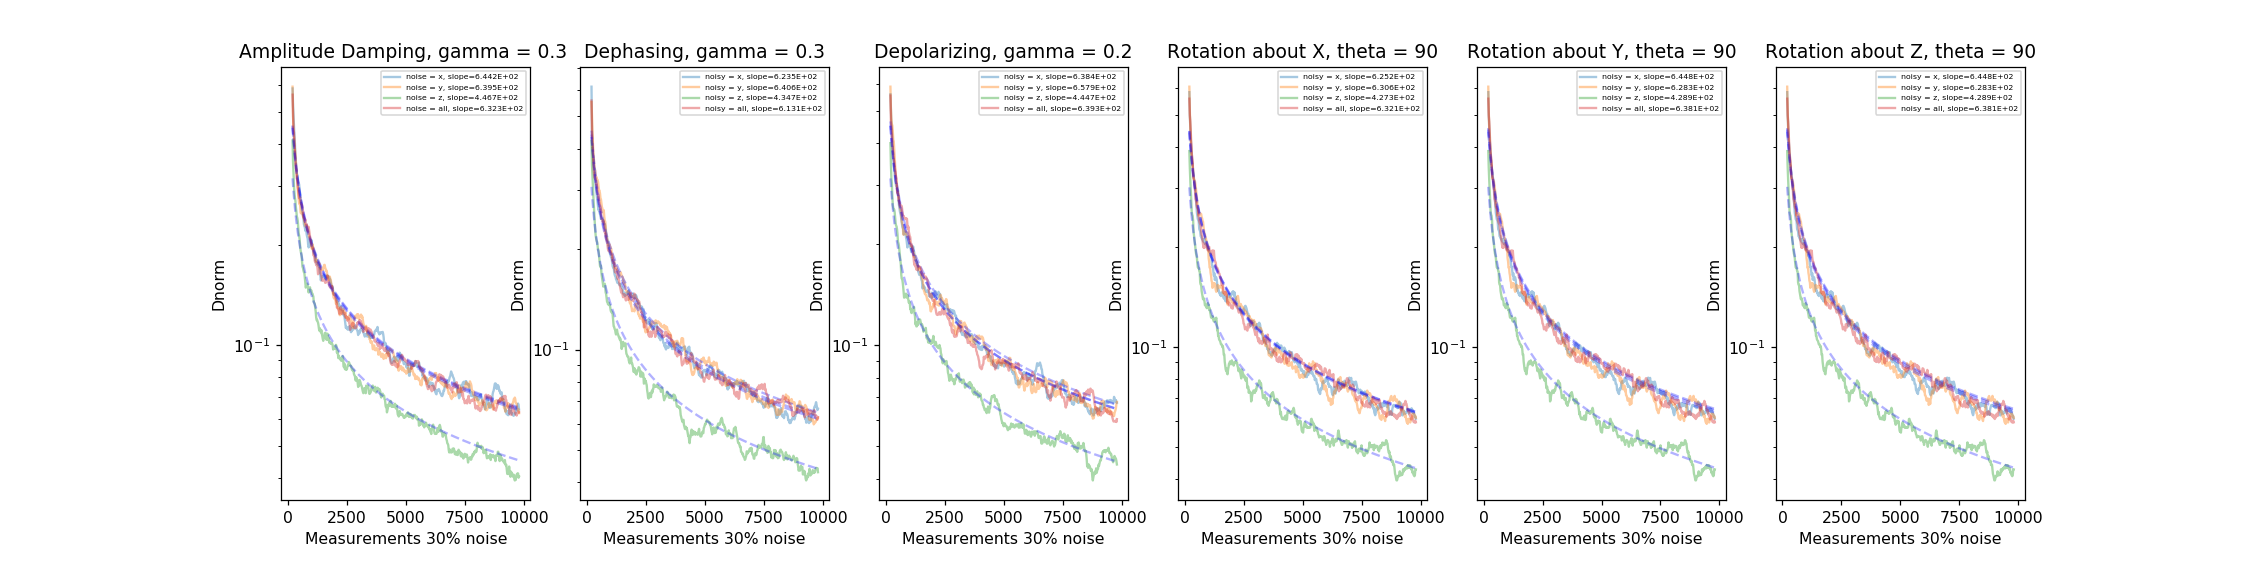

Text(0.5, 1.0, 'Rotation about Z, theta = 90')

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))
w=20   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 10
w2=10
measurements = ma(np.arange(10,10000, 20), w)
measurements2 = ma(np.arange(10,10000, 20), 1)
for noise in ['x', 'y', 'z', 'all']:
    with open("ampdamp_fixede{}n3.pickle".format(noise), "rb") as handle:
        c1n = pickle.load(handle)

    with open("dephase_fixede{}n3.pickle".format(noise), "rb") as handle:
        c2n = pickle.load(handle)

    with open("depol_fixede{}n3.pickle".format(noise), "rb") as handle:
        c3n = pickle.load(handle)
    with open("rotationx90_fixede{}n3.pickle".format(noise), "rb") as handle:
        c4n = pickle.load(handle)
    with open("rotationy90_fixede{}n3.pickle".format(noise), "rb") as handle:
        c5n = pickle.load(handle)
    with open("rotationz90_fixede{}n3.pickle".format(noise), "rb") as handle:
        c6n = pickle.load(handle)
        
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]

    mc3n = ma(c3n, 1)[np.where(ma(c3n, 1) < ycutoff)]
    mc3n = mc3n[np.where(m < xcutoff)]
    
    mc4n = ma(c4n, 1)[np.where(ma(c4n, 1) < ycutoff)]
    mc4n = mc4n[np.where(m < xcutoff)]
    
    mc5n = ma(c5n, 1)[np.where(ma(c5n, 1) < ycutoff)]
    mc5n = mc5n[np.where(m < xcutoff)]
    
    mc6n = ma(c6n, 1)[np.where(ma(c6n, 1) < ycutoff)]
    mc6n = mc6n[np.where(m < xcutoff)]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc3n, w2), p0=(1,1), maxfev=6000)
    slope3, a3 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc4n, w2), p0=(1,1), maxfev=6000)
    slope4, a4 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc5n, w2), p0=(1,1), maxfev=6000)
    slope5, a5 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc5n, w2), p0=(1,1), maxfev=6000)
    slope6, a6 = popt[0], popt[1]
    
    ax[0].semilogy(measurements, ma(c1n, w), alpha=0.4, label='noise = {}, slope={:.3E}'.format(noise, slope1, a1))
    ax[1].semilogy(measurements, ma(c2n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope2, a2))
    ax[2].semilogy(measurements, ma(c3n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope3, a3))
    ax[3].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope4, a4)) 
    ax[4].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope5, a5))   
    ax[5].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope6, a6))   
    
    ax[0].semilogy(measurements, func(measurements, slope1, a1), 'b--',alpha=0.3)
    ax[1].semilogy(measurements, func(measurements,slope2, a2), 'b--',alpha=0.3)
    ax[2].semilogy(measurements, func(measurements, slope3, a3), 'b--',alpha=0.3)
    ax[3].semilogy(measurements, func(measurements, slope4, a4), 'b--',alpha=0.3)
    ax[4].semilogy(measurements, func(measurements, slope5, a5), 'b--',alpha=0.3)
    ax[5].semilogy(measurements, func(measurements, slope6, a6), 'b--',alpha=0.3)
    
ax[0].set_xlabel("Measurements 30% noise")
ax[1].set_xlabel("Measurements 30% noise")
ax[2].set_xlabel("Measurements 30% noise")
ax[3].set_xlabel("Measurements 30% noise")
ax[4].set_xlabel("Measurements 30% noise")
ax[5].set_xlabel("Measurements 30% noise")
ax[0].set_ylabel("Dnorm")
ax[1].set_ylabel("Dnorm")
ax[2].set_ylabel("Dnorm")
ax[3].set_ylabel("Dnorm")
ax[4].set_ylabel("Dnorm")
ax[5].set_ylabel("Dnorm")

ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[2].legend(fontsize=5)
ax[3].legend(fontsize=5)
ax[4].legend(fontsize=5)
ax[5].legend(fontsize=5)
    
ax[0].set_title(r"Amplitude Damping, gamma = 0.3 ")
ax[1].set_title("Dephasing, gamma = 0.3")
ax[2].set_title("Depolarizing, gamma = 0.2")
ax[3].set_title("Rotation about X, theta = 90")
ax[4].set_title("Rotation about Y, theta = 90")
ax[5].set_title("Rotation about Z, theta = 90")

Not realistic enough. Too good to be true!! Probabilities must sum to 1

## Noise model 3: Pseudopure measurements where the noisy measurements simply vanish into thin air!!

Note that this model lacks extremal noise simulation as those measurements are always sampled from a sure probability vector..
Not looking good. No real noise variation here. Also z-axis noise should decay faster based on observations made by others

<IPython.core.display.Javascript object>


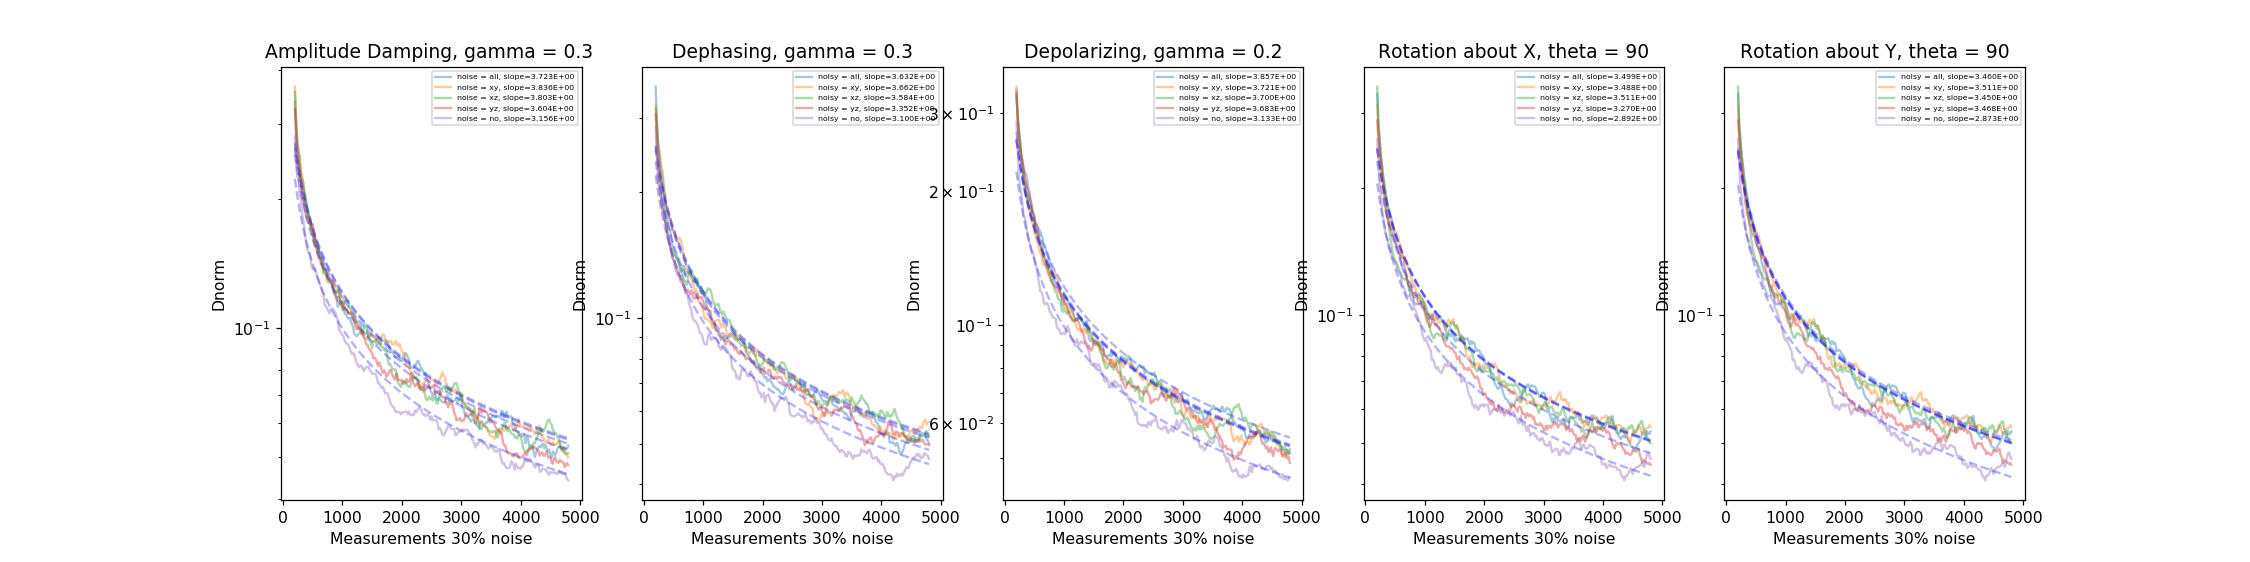

Text(0.5, 1.0, 'Rotation about Y, theta = 90')

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))
w=20   # smooth out the noise by choosing a moving average window
xcutoff = 9900  # cutoffs for fitting decay curve ansatz
ycutoff = 10
w2=10
measurements = ma(np.arange(10,5000, 20), w)
measurements2 = ma(np.arange(10,5000, 20), 1)
for noise in ['all', 'xy', 'xz', 'yz', 'no']:
    with open("ampdamp_fixede{}n6.pickle".format(noise), "rb") as handle:
        c1n = pickle.load(handle)

    with open("dephase_fixede{}n6.pickle".format(noise), "rb") as handle:
        c2n = pickle.load(handle)

    with open("depol_fixede{}n6.pickle".format(noise), "rb") as handle:
        c3n = pickle.load(handle)
    with open("rotationx90_fixede{}n6.pickle".format(noise), "rb") as handle:
        c4n = pickle.load(handle)
    with open("rotationy90_fixede{}n6.pickle".format(noise), "rb") as handle:
        c5n = pickle.load(handle)
        
    mc1n, m = ma(c1n, 1)[np.where(ma(c1n, 1) < ycutoff)], measurements2[np.where(ma(c1n, 1) < ycutoff)]
    mc1n, m = mc1n[np.where(m < xcutoff)], m[np.where(m < xcutoff)]    
    
    mc2n = ma(c2n, 1)[np.where(ma(c2n, 1) < ycutoff)]
    mc2n = mc2n[np.where(m < xcutoff)]

    mc3n = ma(c3n, 1)[np.where(ma(c3n, 1) < ycutoff)]
    mc3n = mc3n[np.where(m < xcutoff)]
    
    mc4n = ma(c4n, 1)[np.where(ma(c4n, 1) < ycutoff)]
    mc4n = mc4n[np.where(m < xcutoff)]
    
    mc5n = ma(c5n, 1)[np.where(ma(c5n, 1) < ycutoff)]
    mc5n = mc5n[np.where(m < xcutoff)]
    

    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc1n, w2), p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc2n, w2), p0=(1,1), maxfev=6000)
    slope2, a2 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc3n, w2), p0=(1,1), maxfev=6000)
    slope3, a3 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc4n, w2), p0=(1,1), maxfev=6000)
    slope4, a4 = popt[0], popt[1]
    
    popt, pcov = curve_fit(func, ma(m, w2), ma(mc5n, w2), p0=(1,1), maxfev=6000)
    slope5, a5 = popt[0], popt[1]
    

    ax[0].semilogy(measurements, ma(c1n, w), alpha=0.4, label='noise = {}, slope={:.3E}'.format(noise, slope1, a1))
    ax[1].semilogy(measurements, ma(c2n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope2, a2))
    ax[2].semilogy(measurements, ma(c3n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope3, a3))
    ax[3].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope4, a4)) 
    ax[4].semilogy(measurements, ma(c4n, w),alpha=0.4, label='noisy = {}, slope={:.3E}'.format(noise, slope5, a5))   
   
    
    ax[0].semilogy(measurements, func(measurements, slope1, a1), 'b--',alpha=0.3)
    ax[1].semilogy(measurements, func(measurements,slope2, a2), 'b--',alpha=0.3)
    ax[2].semilogy(measurements, func(measurements, slope3, a3), 'b--',alpha=0.3)
    ax[3].semilogy(measurements, func(measurements, slope4, a4), 'b--',alpha=0.3)
    ax[4].semilogy(measurements, func(measurements, slope5, a5), 'b--',alpha=0.3)

    
ax[0].set_xlabel("Measurements 30% noise")
ax[1].set_xlabel("Measurements 30% noise")
ax[2].set_xlabel("Measurements 30% noise")
ax[3].set_xlabel("Measurements 30% noise")
ax[4].set_xlabel("Measurements 30% noise")

ax[0].set_ylabel("Dnorm")
ax[1].set_ylabel("Dnorm")
ax[2].set_ylabel("Dnorm")
ax[3].set_ylabel("Dnorm")
ax[4].set_ylabel("Dnorm")


ax[0].legend(fontsize=5)
ax[1].legend(fontsize=5)
ax[2].legend(fontsize=5)
ax[3].legend(fontsize=5)
ax[4].legend(fontsize=5)

    
ax[0].set_title(r"Amplitude Damping, gamma = 0.3 ")
ax[1].set_title("Dephasing, gamma = 0.3")
ax[2].set_title("Depolarizing, gamma = 0.2")
ax[3].set_title("Rotation about X, theta = 90")
ax[4].set_title("Rotation about Y, theta = 90")


Final seal in the coffin: No noise model is too close to 30% noise. Not realistic enough I'm afraid

### Single preparation axis rotation no noise for amplitude damping

<IPython.core.display.Javascript object>


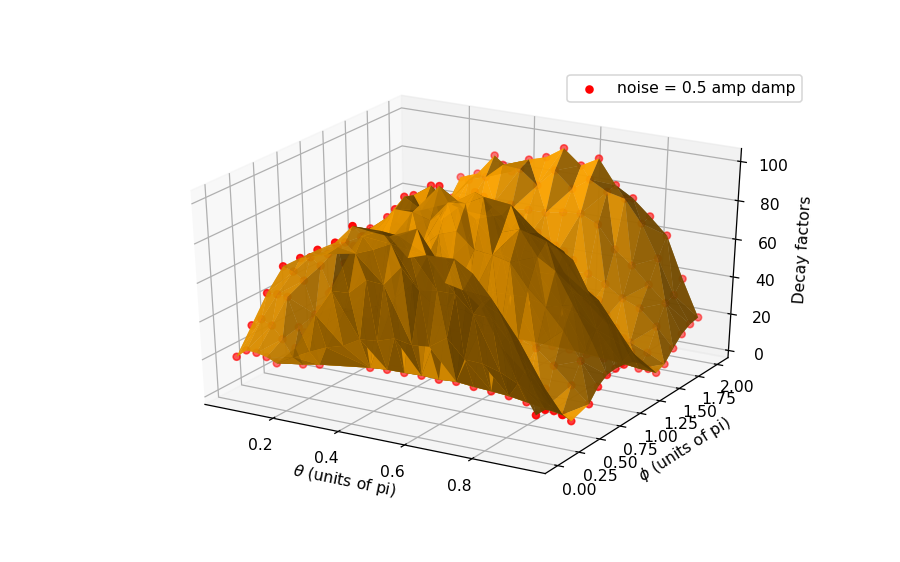

C:\Users\mirta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [41]:
def func(x, b, c):
     return np.exp((0.001*(-b * x))) + c

def func(x, b, c):
     return b*x**(-0.5) + 0*np.exp(-0.01*(x*c))
    
def decay_param(file, measurements, xcutoff=9900, ycutoff = 5, w=1):
    with open(file, "rb") as handle:
        c = pickle.load(handle)
    mcn, m = ma(c, w)[np.where(ma(c, w) < ycutoff)], ma(measurements, w)[np.where(ma(c, w) < ycutoff)]
    mcn, m = mcn[np.where(m < xcutoff)], m[np.where(m < xcutoff)]
    popt, pcov = curve_fit(func, m, mcn, p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    return 1000 / popt[0]

def decs(file_format, qplist, noise, measurements=np.arange(10, 10000, 20)):
    ampdamps = []
    failed = []
    for i in range(len(qplist)):
        try:
            ampdamps.append(decay_param(file_format.format(int(noise*100), i), measurements = measurements))
        except FileNotFoundError as e:
            failed.append(i)
        except TypeError as e:
           failed.append(i)
        except ValueError as e:
          failed.append(i)
    qps = np.array(qplist)[[i for i in range(len(qplist)) if i not in 
failed]]
    return ampdamps, qps


qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, np.pi, 20) for phi in np.linspace(0, 2*np.pi, 20)]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(111, projection='3d')
dfs = []
for noise in [0.5]:
    ampdamps, qps = decs("ampdamp{}n_{}maxis2.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise), c='r')
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8, color='orange')
ax0.set_xlabel(r'$\theta$ (units of pi)')
ax0.set_ylabel(r'$\phi$ (units of pi)')
ax0.set_zlabel('Decay factors')
ax0.legend()

In [42]:
ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8, color='orange')

<IPython.core.display.Javascript object>


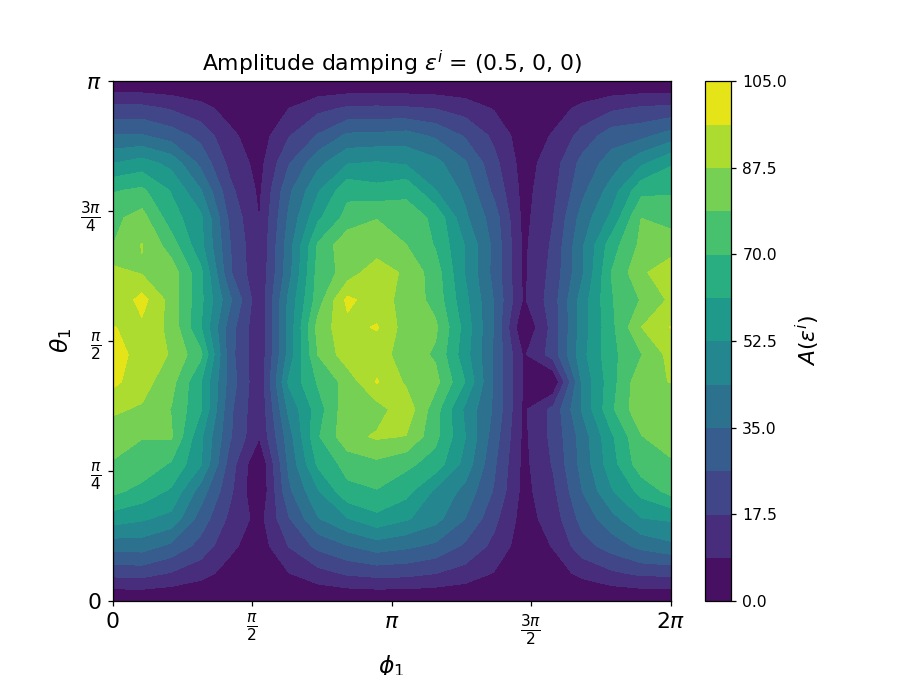

In [47]:
amps = []
c = 0
for i in np.array(qplist)[:, 0]:
    search = [(i == qps[:, 0][j]).all() for j in range(len(qps))]
    if True not in search:
        amps.append(0) # impute missing failed opts for contour plot
    else:
        amps.append(ampdamps[c])
        c+=1
plt.figure(figsize=(8,6))
k = plt.contourf(np.linspace(0, 2*np.pi, 20), np.linspace(0, np.pi, 20),np.array(amps).reshape(20,20), levels = np.linspace(0, 105, 13))
plt.ylabel(r"$\theta_1$", size=15)
plt.xlabel(r"$\phi_1$", size=15)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], size=14)
plt.yticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi],
           ['$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'], size=14)
cbar = plt.colorbar(k)
cbar.set_label(r'$A(\epsilon^i)$', fontsize=14)
plt.title('Amplitude damping $\epsilon^i$ = (0.5, 0, 0)', size=14)
plt.show()
plt.savefig("foo.pdf", bbox_inches='tight')

### For all channels at 3 noise levels:

<IPython.core.display.Javascript object>


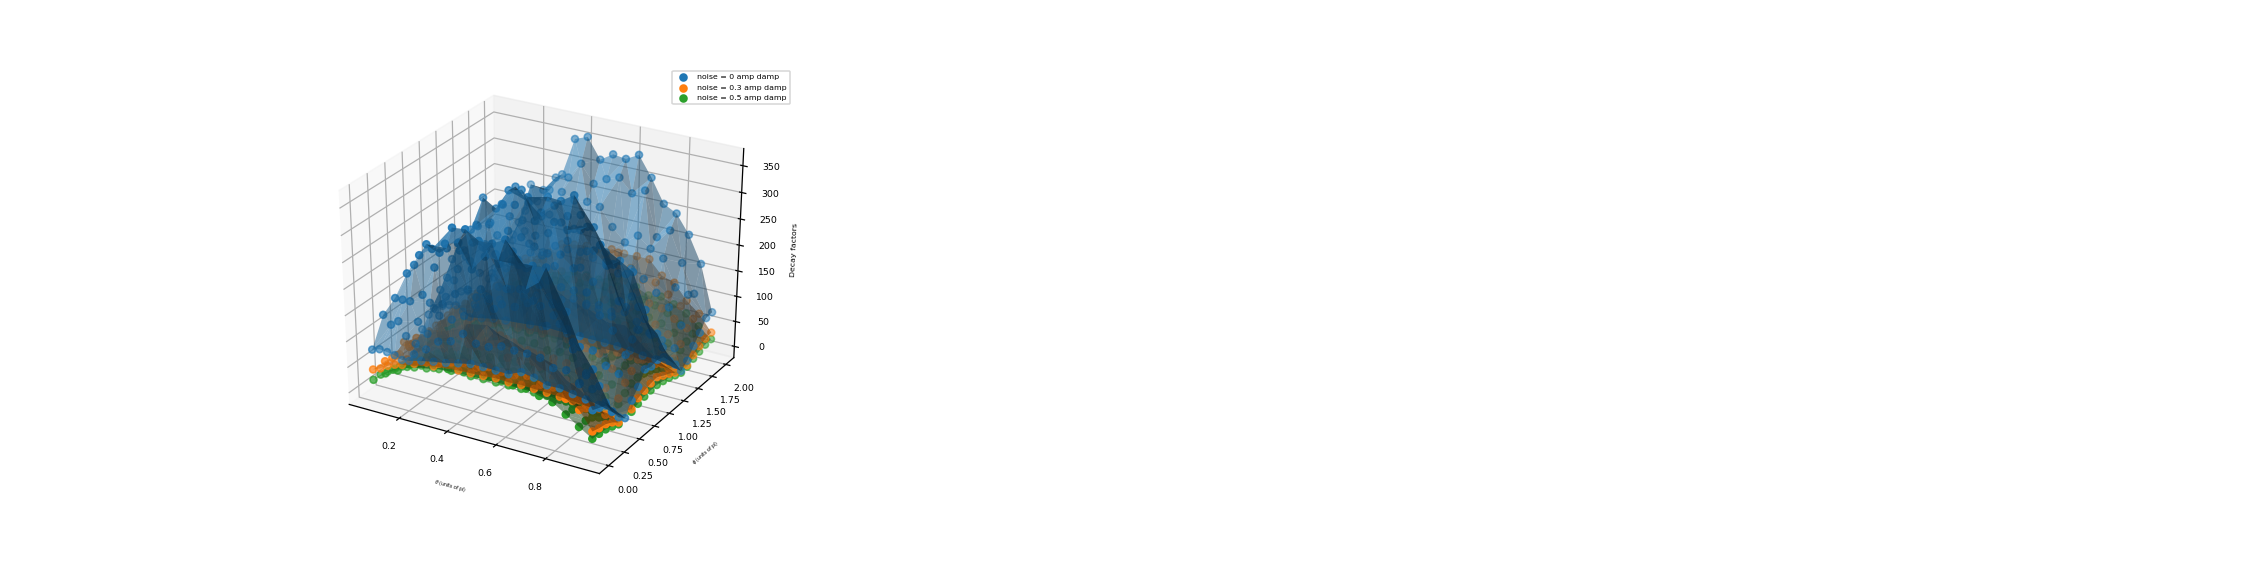

In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(20, 5))
ax0 = fig.add_subplot(131, projection='3d')
for noise in [0, 0.3, 0.5]:
    ampdamps, qps = decs("depol{}n_{}maxis2.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise))
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.5)
ax0.set_xlabel(r'$\theta$ (units of pi)', fontsize=3, labelpad=2)
ax0.set_ylabel(r'$\phi$ (units of pi)', fontsize=3, labelpad=2)
ax0.set_zlabel('Decay factors', fontsize=5, labelpad=2)
ax0.legend(fontsize=5)
ax0.tick_params(axis='both', which='major', labelsize=6)
#plt.savefig("results.png", transparent=True)

<IPython.core.display.Javascript object>


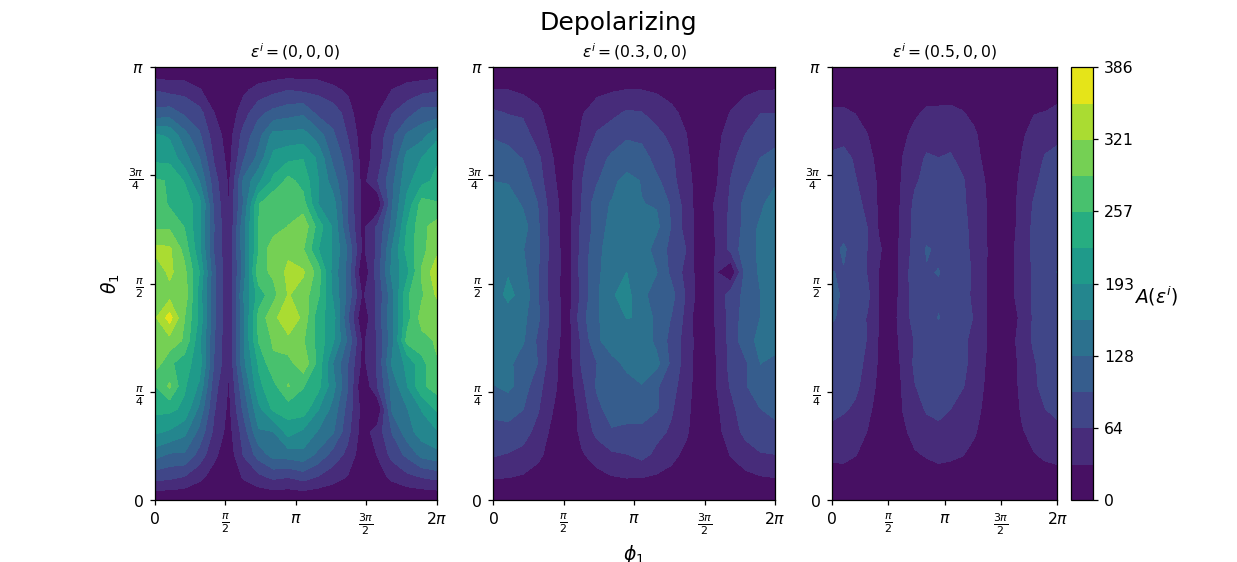

C:\Users\mirta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [65]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(11, 5))
for co, noise in enumerate([0, 0.3, 0.5]):
    ampdamps, qps = decs("ampdamp{}n_{}maxis2.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    amps = [] 
    c = 0
    
    for i in np.array(qplist)[:, 0]:
        search = [(i == qps[:, 0][j]).all() for j in range(len(qps))]
        if True not in search:
            amps.append(0) # impute missing failed opts for contour plot
        else:
            amps.append(ampdamps[c])
            c+=1

    if co == 0:
        normalizer = max(ampdamps)
        k = ax[co].contourf(np.linspace(0, 2*np.pi, 20), np.linspace(0, np.pi, 20),np.array(amps).reshape(20,20), cmap=cm.viridis, levels = np.linspace(0, int(normalizer+20),13).astype(int))
    else:
        ax[co].contourf(np.linspace(0, 2*np.pi, 20), np.linspace(0, np.pi, 20),np.array(amps).reshape(20,20), cmap=cm.viridis, levels = k.levels)
    
    #amps /= normalizer
    
    if co == 0:
        ax[co].set_ylabel(r"$\theta_1$", size=12)
    if co == 1:
        ax[co].set_xlabel(r"$\phi_1$", size=12)
    ax[co].set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax[co].set_xticklabels(['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
    ax[co].set_yticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
    ax[co].set_yticklabels(['$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
    ax[co].set_title(r'$\epsilon^i = ({}, 0, 0)$'.format(noise), fontsize=10)
cbar = plt.colorbar(k, ax = ax[2])
cbar.set_label(label=r'$A({\epsilon^i})$', rotation=0, size=12, labelpad=14)
fig.suptitle("Depolarizing", fontsize=16)
plt.savefig("contour2.pdf", bbox_inches='tight', dpi=300)

For single preparation axis it seems that the rotation does not help much with improvement in estimation for the three channels under study

## Single axis rotation for two axis 30% noise in x and z

<IPython.core.display.Javascript object>


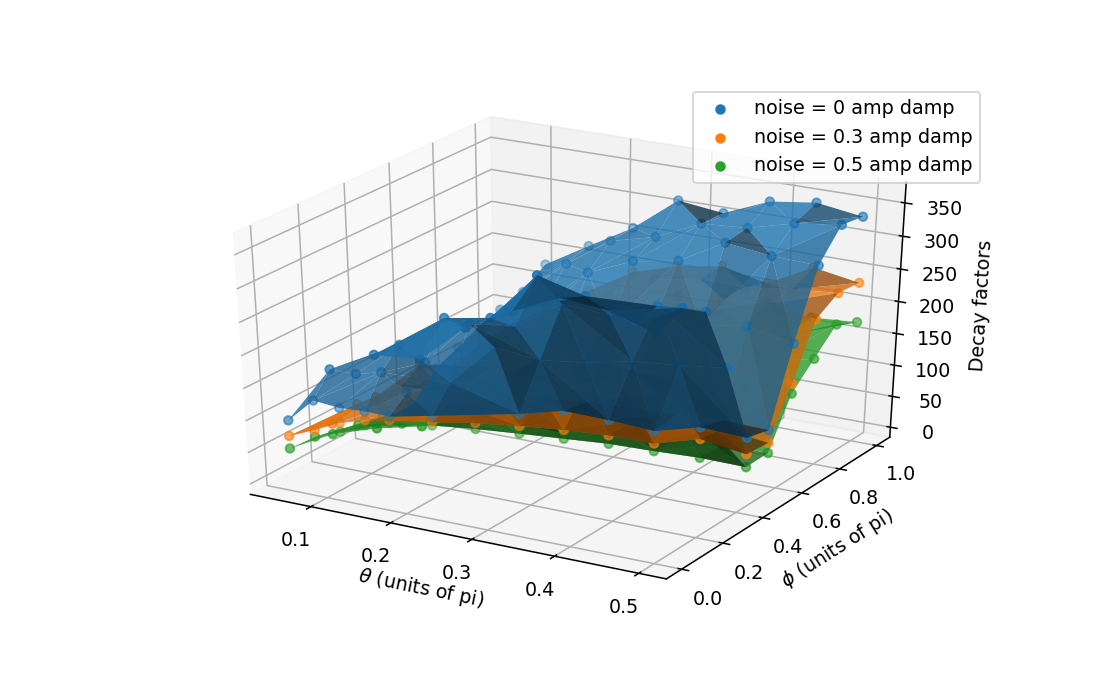

In [38]:
def func(x, b, c):
     return np.exp((0.001*(-b * x))) + c

def func(x, b, c):
     return b*x**(-0.5) + 0*np.exp(-0.01*(x*c))
    
def decay_param(file, measurements, xcutoff=9900, ycutoff = 5, w=1):
    with open(file, "rb") as handle:
        c = pickle.load(handle)
    mcn, m = ma(c, w)[np.where(ma(c, w) < ycutoff)], ma(measurements, w)[np.where(ma(c, w) < ycutoff)]
    mcn, m = mcn[np.where(m < xcutoff)], m[np.where(m < xcutoff)]
    popt, pcov = curve_fit(func, m, mcn, p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    return 1000 / popt[0]

def decs(file_format, qplist, noise, measurements=np.arange(10, 10000, 20)):
    ampdamps = []
    failed = []
    for i in range(len(qplist)):
        try:
            ampdamps.append(decay_param(file_format.format(int(noise*100), i), measurements = measurements))
        except FileNotFoundError as e:
            failed.append(i)
        except TypeError as e:
           failed.append(i)
        except ValueError as e:
          failed.append(i)
    qps = np.array(qplist)[[i for i in range(len(qplist)) if i not in 
failed]]
    return ampdamps, qps


qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(111, projection='3d')
for noise in [0, 0.3, 0.5]:
    ampdamps, qps = decs("axis_1/ampdamp{}n_{}maxis5.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise)) #c='r')
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8)#, color='orange')
ax0.set_xlabel(r'$\theta$ (units of pi)')
ax0.set_ylabel(r'$\phi$ (units of pi)')
ax0.set_zlabel('Decay factors')
ax0.legend()

<IPython.core.display.Javascript object>


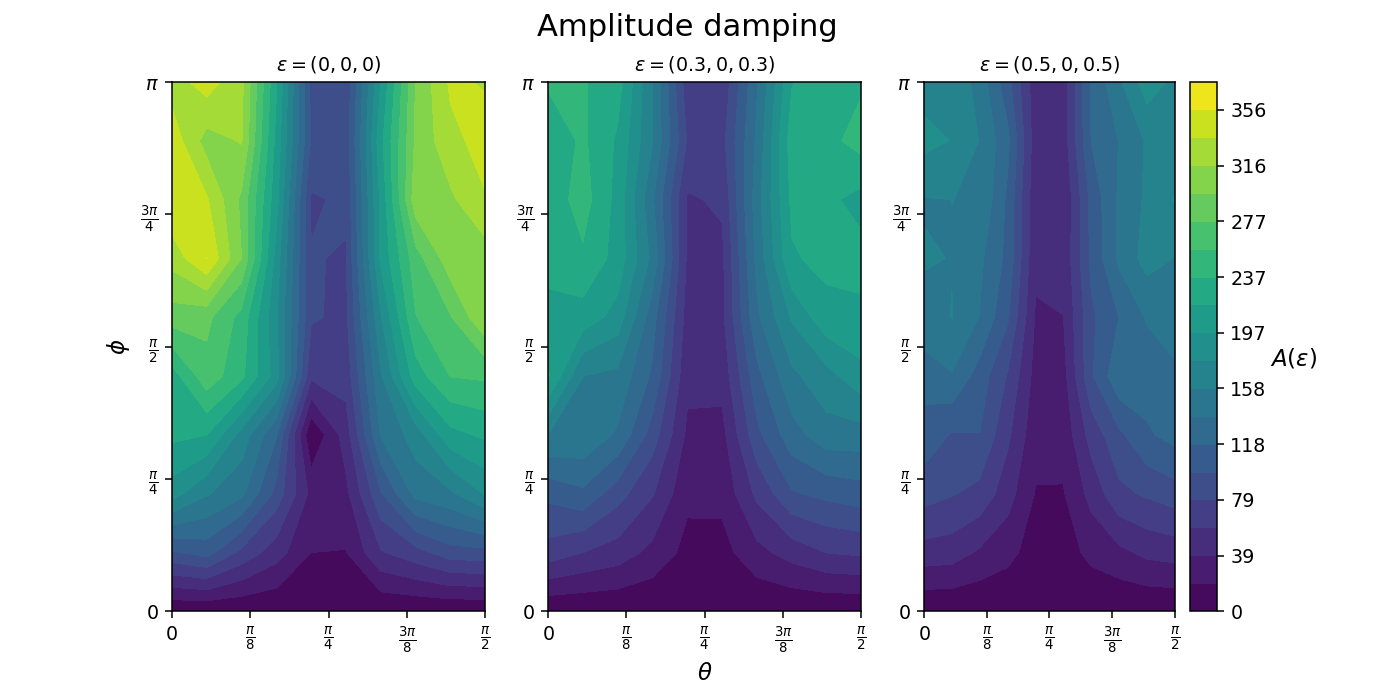

Text(0.5, 0.98, 'Amplitude damping')

In [76]:
file = "axis_1/ampdamp{}n_{}maxis5.pickle"
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]

for co, noise in enumerate([0, 0.3, 0.5]):
    ampdamps, qps = decs(file, qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    amps = [] 
    c = 0
    
    for i in np.array(qplist)[:, 0]:
        search = [(i == qps[:, 0][j]).all() for j in range(len(qps))]
        if True not in search:
            amps.append(0) # impute missing failed opts for contour plot
        else:
            amps.append(ampdamps[c])
            c+=1
    #amps /= normalizer
    if co == 0:
        normalizer = max(amps)
        k = ax[co].contourf(np.linspace(0, 0.5*np.pi, 10), np.linspace(0, np.pi, 10),np.array(amps).reshape(10,10), cmap=cm.viridis, levels = np.linspace(0, int(normalizer+20),20).astype(int))
    else:
        ax[co].contourf(np.linspace(0, 0.5*np.pi, 10), np.linspace(0, np.pi, 10),np.array(amps).reshape(10,10), cmap=cm.viridis, levels = k.levels)
    

    
    if co == 1:
        ax[co].set_xlabel(r"$\theta$", size=12)
    if co == 0:
        ax[co].set_ylabel(r"$\phi$", size=12)
    ax[co].set_xticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
    ax[co].set_xticklabels(['$0$', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$'])
    ax[co].set_yticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
    ax[co].set_yticklabels(['$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
    ax[co].set_title(r'$\epsilon = ({0}, 0, {0})$'.format(noise), fontsize=10)

cbar = plt.colorbar(k, ax = ax[2])
cbar.set_label(label=r'$A({\epsilon})$', rotation=0, size=12, labelpad=14)
fig.suptitle("Amplitude damping", fontsize=16)

## Single axis rotation for two axis 30% noise in x and y

<IPython.core.display.Javascript object>


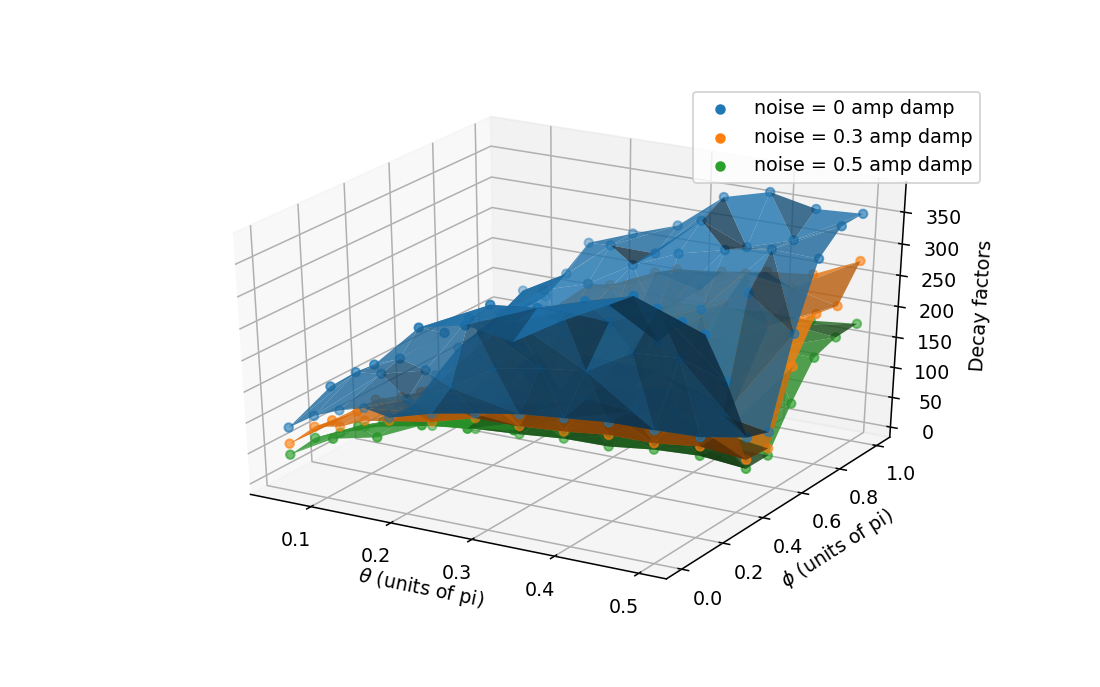

In [77]:
def func(x, b, c):
     return np.exp((0.001*(-b * x))) + c

def func(x, b, c):
     return b*x**(-0.5) + 0*np.exp(-0.01*(x*c))
    
def decay_param(file, measurements, xcutoff=9900, ycutoff = 5, w=1):
    with open(file, "rb") as handle:
        c = pickle.load(handle)
    mcn, m = ma(c, w)[np.where(ma(c, w) < ycutoff)], ma(measurements, w)[np.where(ma(c, w) < ycutoff)]
    mcn, m = mcn[np.where(m < xcutoff)], m[np.where(m < xcutoff)]
    popt, pcov = curve_fit(func, m, mcn, p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    return 1000 / popt[0]

def decs(file_format, qplist, noise, measurements=np.arange(10, 10000, 20)):
    ampdamps = []
    failed = []
    for i in range(len(qplist)):
        try:
            ampdamps.append(decay_param(file_format.format(int(noise*100), i), measurements = measurements))
        except FileNotFoundError as e:
            failed.append(i)
        except TypeError as e:
           failed.append(i)
        except ValueError as e:
          failed.append(i)
    qps = np.array(qplist)[[i for i in range(len(qplist)) if i not in 
failed]]
    return ampdamps, qps


qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(111, projection='3d')
for noise in [0, 0.3, 0.5]:
    ampdamps, qps = decs("axis_1/rotx90{}n_{}maxis7.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise)) #c='r')
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8)#, color='orange')
ax0.set_xlabel(r'$\theta$ (units of pi)')
ax0.set_ylabel(r'$\phi$ (units of pi)')
ax0.set_zlabel('Decay factors')
ax0.legend()

In [66]:
def contour(file, title, epsilon = r'$\epsilon = ({0}, 0, {0})$', conts = 20):
    fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(10, 5))
    qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]

    for co, noise in enumerate([0, 0.3, 0.5]):
        ampdamps, qps = decs(file, qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
        amps = [] 
        c = 0

        for i in np.array(qplist)[:, 0]:
            search = [(i == qps[:, 0][j]).all() for j in range(len(qps))]
            if True not in search:
                amps.append(0) # impute missing failed opts for contour plot
            else:
                amps.append(ampdamps[c])
                c+=1
        #amps /= normalizer
        if co == 0:
            normalizer = max(amps)
            k = ax[co].contourf(np.linspace(0, np.pi, 10), np.linspace(0, 0.5*np.pi, 10),np.array(amps).reshape(10,10), cmap=cm.viridis, levels = np.linspace(0, int(normalizer+20),conts).astype(int))
        else:
            ax[co].contourf(np.linspace(0, np.pi, 10), np.linspace(0, 0.5*np.pi, 10),np.array(amps).reshape(10,10), cmap=cm.viridis, levels = k.levels)

        #amps /= normalizer

        if co == 0:
            ax[co].set_ylabel(r"$\theta_1$", size=12)
        if co == 1:
            ax[co].set_xlabel(r"$\phi_1$", size=12)
        ax[co].set_yticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
        ax[co].set_yticklabels(['$0$', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$'])
        ax[co].set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
        ax[co].set_xticklabels(['$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
        ax[co].set_title(epsilon.format(noise), fontsize=10)
   
    cbar = plt.colorbar(k, ax = ax[2])
    cbar.set_label(label=r'$A({\epsilon ^ i})$', rotation=0, size=12, labelpad=14)
    fig.suptitle(title, fontsize=16)

<IPython.core.display.Javascript object>


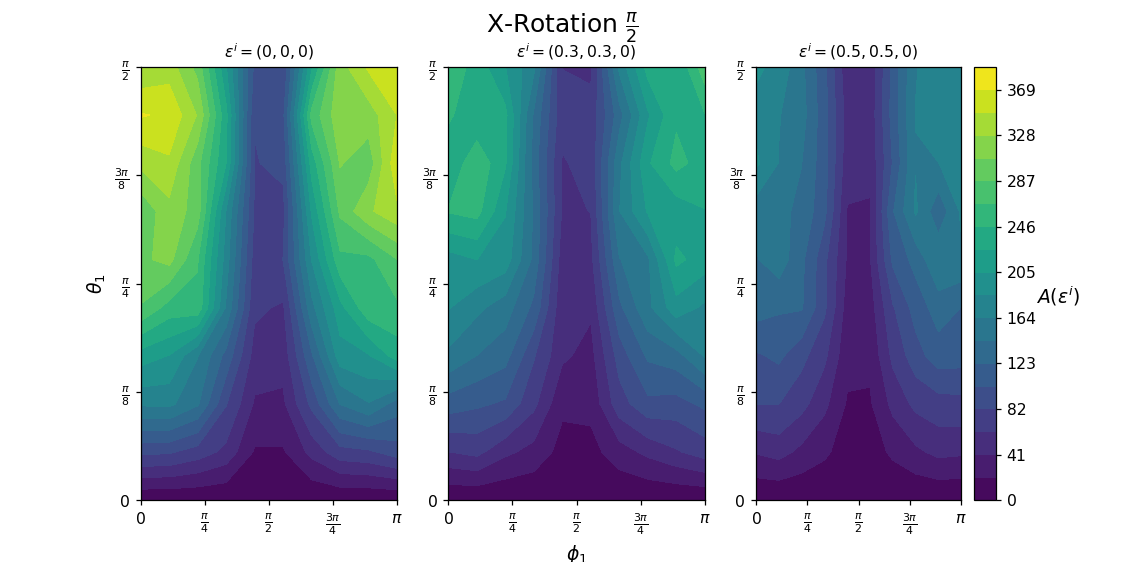

C:\Users\mirta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [67]:
contour(file = "axis_1/rotx90{}n_{}maxis7.pickle", title = r"X-Rotation $\frac{\pi}{2}$", epsilon = r'$\epsilon^i = ({0}, {0}, 0)$')


## Single axis rotation for two axis 30% noise in x (again? -> sanity check)

<IPython.core.display.Javascript object>


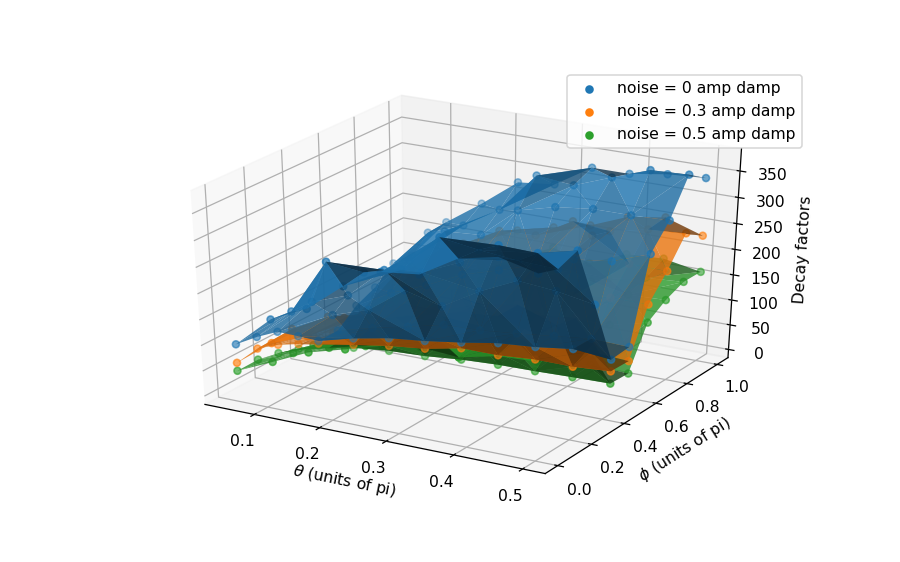

In [68]:
def func(x, b, c):
     return np.exp((0.001*(-b * x))) + c

def func(x, b, c):
     return b*x**(-0.5) + 0*np.exp(-0.01*(x*c))
    
def decay_param(file, measurements, xcutoff=9900, ycutoff = 5, w=1):
    with open(file, "rb") as handle:
        c = pickle.load(handle)
    mcn, m = ma(c, w)[np.where(ma(c, w) < ycutoff)], ma(measurements, w)[np.where(ma(c, w) < ycutoff)]
    mcn, m = mcn[np.where(m < xcutoff)], m[np.where(m < xcutoff)]
    popt, pcov = curve_fit(func, m, mcn, p0=(1,1), maxfev=6000)
    slope1, a1 = popt[0], popt[1]
    return 1000 / popt[0]

def decs(file_format, qplist, noise, measurements=np.arange(10, 10000, 20)):
    ampdamps = []
    failed = []
    for i in range(len(qplist)):
        try:
            ampdamps.append(decay_param(file_format.format(int(noise*100), i), measurements = measurements))
        except FileNotFoundError as e:
            failed.append(i)
        except TypeError as e:
           failed.append(i)
        except ValueError as e:
          failed.append(i)
    qps = np.array(qplist)[[i for i in range(len(qplist)) if i not in 
failed]]
    return ampdamps, qps


qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(111, projection='3d')
for noise in [0, 0.3, 0.5]:
    ampdamps, qps = decs("xnoisesingle/ax1_0_rotx90{}n_{}maxis4.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise)) #c='r')
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8)#, color='orange')
ax0.set_xlabel(r'$\theta$ (units of pi)')
ax0.set_ylabel(r'$\phi$ (units of pi)')
ax0.set_zlabel('Decay factors')
ax0.legend()

<IPython.core.display.Javascript object>


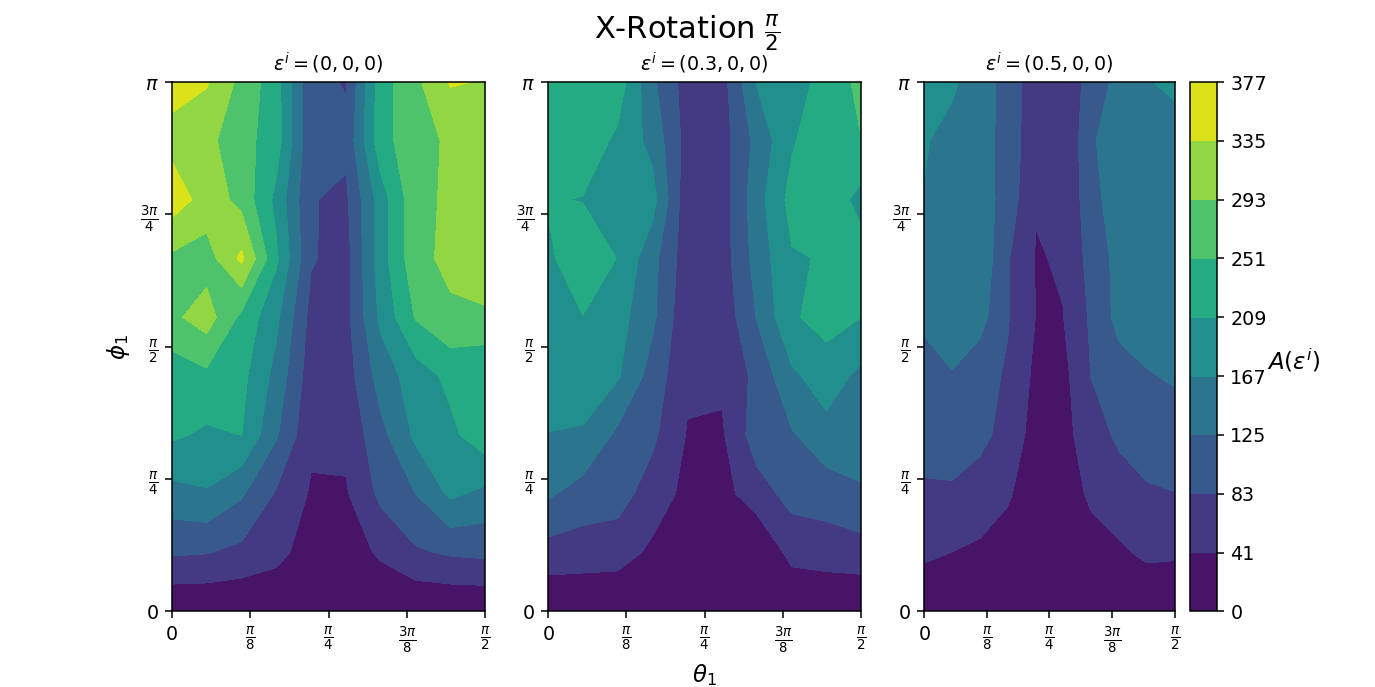

In [106]:
contour(file = "xnoisesingle/ax1_0_rotx90{}n_{}maxis4.pickle", title = r"X-Rotation $\frac{\pi}{2}$", epsilon = r'$\epsilon^i = ({0}, 0, 0)$', conts=10)


For single preparation axis it seems that the rotation does not help much with improvement in estimation for the three channels under study

<IPython.core.display.Javascript object>


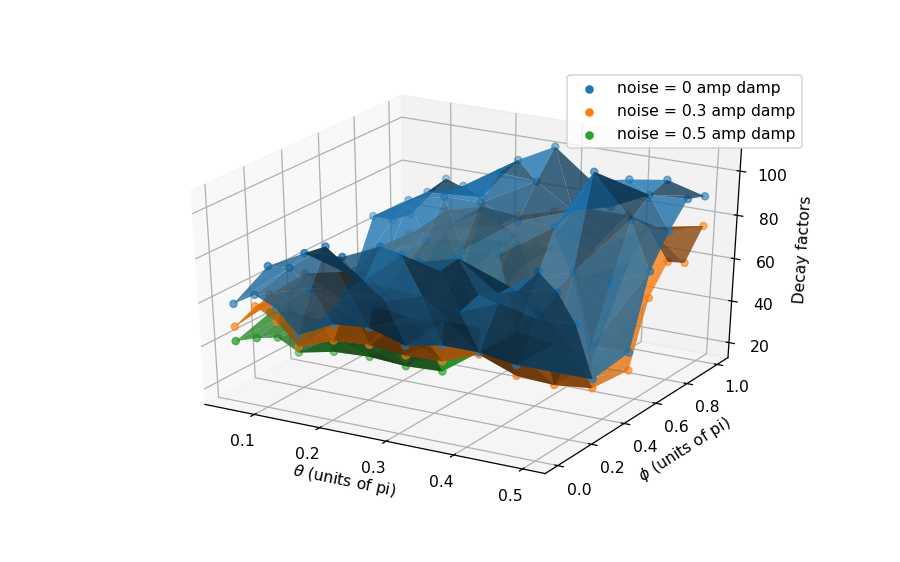

In [72]:
qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8, 5))
ax0 = fig.add_subplot(111, projection='3d')
for noise in [0, 0.3, 0.5]:
    ampdamps, qps = decs("twoaxisrotz/twoaxisrot/yaxis_15/ampdamp{}n_{}maxis7.pickle", qplist=qplist, noise=noise, measurements=np.arange(10, 10000, 20))
    ax0.scatter(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, marker='o', label='noise = {} amp damp'.format(noise)) #c='r')
    ax0.plot_trisurf(qps[:, 0][:, 0] / np.pi, qps[:, 0][:, 1] / np.pi, ampdamps, linewidth=0, alpha=0.8)#, color='orange')
ax0.set_xlabel(r'$\theta$ (units of pi)')
ax0.set_ylabel(r'$\phi$ (units of pi)')
ax0.set_zlabel('Decay factors')
ax0.legend()

In [90]:
angles = [[theta, phi] for theta in np.linspace(0, 0.5*np.pi, 10) / np.pi for phi in np.linspace(0, np.pi, 10) / np.pi]

In [ ]:
for orientation in [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]:
    contour("twoaxisrotz/twoaxisrot/yaxis_{}/ampdamp{}n_{}maxis7.pickle".format(orientation, "{}", "{}"), title = r"Amplitude damping $\theta_2, \phi_2 = {0} \pi, {1}\pi$".format(round(angles[orientation][0], 2), round(angles[orientation][1], 2)), epsilon = r"$\epsilon ^ i = ({0}, 0, 0)$", conts=10)


In [106]:
#for orientation in [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96]:
#    contour("twoaxisrotz/twoaxisrot/yaxis_{}/rotx90{}n_{}maxis7.pickle".format(orientation, "{}", "{}"), title = r"Amplitude damping $\theta_2, \phi_2 = {0} \pi, {1}\pi$".format(round(angles[orientation][0], 2), round(angles[orientation][1], 2)), epsilon = r"$\epsilon ^ i = ({0}, 0, 0)$", conts=10)

from scipy import stats
    
def contour_sequence(file, title, orientations, epsilon = r'$\epsilon = ({0}, 0, {0})$', conts = 20, n=0, figsize=(10, 5), orientation_alpha=95, savefile="contourtest.pdf"):
    "NB: orientations must be divisible by 4"
    
    angles = [[theta, phi] for theta in np.linspace(0, 0.5*np.pi, 10) / np.pi for phi in np.linspace(0, np.pi, 10) / np.pi]
    leftover = int(len(orientations) / 4)
    fig, ax = plt.subplots(ncols=4, nrows=leftover, figsize=figsize)
    qplist = [[[theta, phi], [0.5*np.pi, np.pi*0.5]] for theta in np.linspace(0, 0.5*np.pi, 10) for phi in np.linspace(0, np.pi, 10)]
    
    # anchoring plot done first
    
    # convert orientation alpha -> row, col index
    arow, acol = int(orientations.index(orientation_alpha) / 4) -1, orientation_alpha%4  # just use modular addition
#    print(arow, acol)
    # repeat loop over imputes for anchor 
    ampdamps, qps = decs(file.format(orientation_alpha, "{}", "{}"), qplist=qplist, noise=n, measurements=np.arange(10, 10000, 20))
    amps = [] 
    c = 0
    for i in np.array(qplist)[:, 0]:
        search = [(i == qps[:, 0][j]).all() for j in range(len(qps))]
        if True not in search:
            amps.append(0) # impute missing failed opts for contour plot
        else:
            amps.append(ampdamps[c])
            c+=1
    
    normalizer = max(amps)
    k = ax[arow][acol].contourf(np.linspace(0, np.pi, 10), np.linspace(0, 0.5*np.pi, 10),np.array(amps).reshape(10,10), cmap=cm.viridis, levels = np.linspace(0, int(normalizer+20),conts).astype(int))
    ax[arow][acol].spines['bottom'].set_linewidth(3)
    ax[arow][acol].spines['bottom'].set_color('red')
    ax[arow][acol].spines['top'].set_linewidth(3)
    ax[arow][acol].spines['top'].set_color('red')
    ax[arow][acol].spines['right'].set_linewidth(3)
    ax[arow][acol].spines['right'].set_color('red')
    ax[arow][acol].spines['left'].set_linewidth(3)
    ax[arow][acol].spines['left'].set_color('red')
    thetas, phis = np.linspace(0, 0.5*np.pi, 10), np.linspace(0, np.pi, 10)
    co=0
    for row in range(leftover):
        for col in range(4):
    
            ampdamps, qps = decs(file.format(orientations[co], "{}", "{}"), qplist=qplist, noise=n, measurements=np.arange(10, 10000, 20))
            amps = [] 
            c = 0
            for i in np.array(qplist)[:, 0]:
                search = [(i == qps[:, 0][j]).all() for j in range(len(qps))]
                if True not in search:
                    amps.append(0) # impute missing failed opts for contour plot
                else:
                    amps.append(ampdamps[c])
                    c+=1

            #amps /= normalizer
            if True:  # skip the anchoring plot plot
                ax[row][col].contourf(phis, thetas,np.array(amps).reshape(10,10), cmap=cm.viridis, levels = k.levels)
                #mark = np.where(np.array(amps).reshape(10,10) == sorted(amps)[-2])
                #print(sorted(amps)[-15:])
                
                #ax[row][col].plot(thetas[mark[0][0]],phis[mark[1][0]], 'rx', markersize=10)
            #amps /= normalizer

    #        if co == 1:
    #            ax[co].set_xlabel(r"$\theta_1$", size=12)
    #        if co == 0:
    #            ax[co].set_ylabel(r"$\phi_1$", size=12)
                ax[row][col].set_yticks([0, np.pi/8, np.pi/4, 3*np.pi/8, np.pi/2])
                ax[row][col].set_yticklabels(['$0$', r'$\frac{\pi}{8}$', r'$\frac{\pi}{4}$', r'$\frac{3\pi}{8}$', r'$\frac{\pi}{2}$'])
                ax[row][col].set_xticks([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
                ax[row][col].set_xticklabels(['$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])
                ax[row][col].set_title(r"$\theta_2, \phi_2 = {0} \pi, {1}\pi$".format(round(angles[orientations[co]][0], 2), round(angles[orientations[co]][1], 2)), fontsize=8)
#                print(round(angles[orientations[co]][0], 2), round(angles[orientations[co]][1], 2), co)
            co+=1
#    cbar = plt.colorbar(k, ax = (ax[-1][-1], ax[-2][-1]) , pad=0.05)
#    cbar.set_label(label=r'$A({\epsilon ^ i})$', rotation=0, size=12, labelpad=14)
    fig.suptitle(title, fontsize=16, y=0.94)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.82, 0.24, 0.03, 0.5])
    cbar = fig.colorbar(k, cax=cbar_ax,)
    cbar.set_label(label=r'$A({\epsilon ^ i})$', rotation=0, size=12, labelpad=14)
    fig.text(0.5-0.03, 0.07, r"$\phi_1$", size=12, ha='center', va='center')
    fig.text(0.08, 0.5, r"$\theta_1$", size=12, ha='center', va='center', rotation='vertical')
    plt.savefig(savefile, dpi=1000, bbox_inches='tight')

<IPython.core.display.Javascript object>


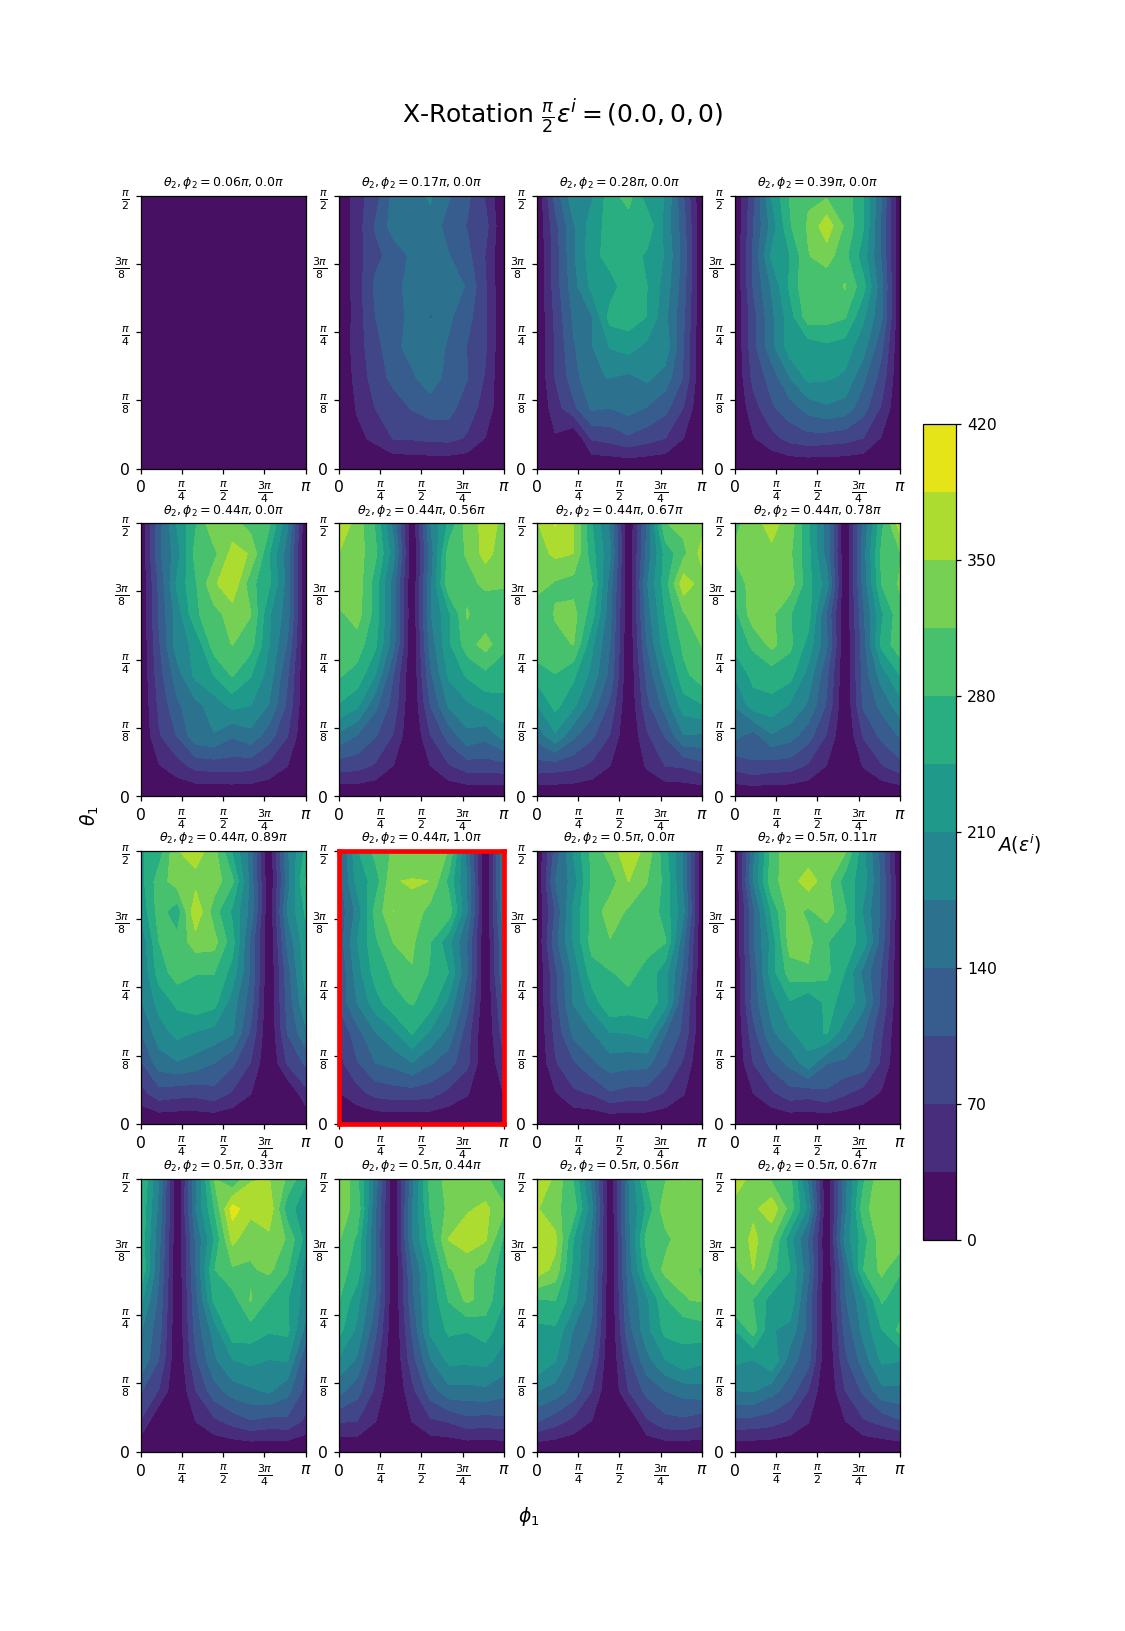

C:\Users\mirta\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [107]:
noise=0.0
contour_sequence("twoaxisrotz/twoaxisrot/yaxis_{}/rotx90{}n_{}maxis7.pickle", 
                 r"X-Rotation $\frac{\pi}{2}$" +"$\epsilon ^ i = ({}, 0, 0)$".format(noise), 
                 orientations=[10, 30, 50, 70, 80, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96], 
                 epsilon = r'$\epsilon = ({0}, 0, {0})$'.format(noise), conts = 13, n=noise, 
                 figsize=(10, 14.5), orientation_alpha=93, savefile="contour3.pdf")